In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(1, 16, 16)

In [4]:
t = np.linspace(0.1, 1.6, 16)

$y = 0.1x$,
$y = 0.2x$,
...,
$y = 1.6x$

In [5]:
sensors = np.zeros((16, 16))
for i in range(0, len(t)):
    for j in range(0, len(x)):
        sensors[i, j] = t[i] * x[j]

In [6]:
sensors = sensors.reshape(16, 16, 1)

In [7]:
sensors

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6]],

       [[ 0.2],
        [ 0.4],
        [ 0.6],
        [ 0.8],
        [ 1. ],
        [ 1.2],
        [ 1.4],
        [ 1.6],
        [ 1.8],
        [ 2. ],
        [ 2.2],
        [ 2.4],
        [ 2.6],
        [ 2.8],
        [ 3. ],
        [ 3.2]],

       [[ 0.3],
        [ 0.6],
        [ 0.9],
        [ 1.2],
        [ 1.5],
        [ 1.8],
        [ 2.1],
        [ 2.4],
        [ 2.7],
        [ 3. ],
        [ 3.3],
        [ 3.6],
        [ 3.9],
        [ 4.2],
        [ 4.5],
        [ 4.8]],

       [[ 0.4],
        [ 0.8],
        [ 1.2],
        [ 1.6],
        [ 2. ],
        [ 2.4],
        [ 2.8],
        [ 3.2],
        [ 3.6],
        [ 4. ],
        [ 4.4],
        [ 4.8],
        [ 5.2],
        [ 5.6],
  

In [8]:
sensors.shape

(16, 16, 1)

In [9]:
t = t.reshape((16, 1))

In [10]:
t_train, t_test, x_train, x_test = train_test_split(t, sensors, test_size=0.1, random_state=1)

In [11]:
t_test

array([[0.4],
       [1.4]])

In [13]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [14]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [15]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 85.8031 - rmse: 9.2630
Epoch 2/10000
1/1 [==============================] - 0s 8ms/step - loss: 85.7984 - rmse: 9.2627
Epoch 3/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.7937 - rmse: 9.2625
Epoch 4/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.7889 - rmse: 9.2622
Epoch 5/10000
1/1 [==============================] - 0s 8ms/step - loss: 85.7842 - rmse: 9.2620
Epoch 6/10000
1/1 [==============================] - 0s 9ms/step - loss: 85.7795 - rmse: 9.2617
Epoch 7/10000
1/1 [==============================] - 0s 8ms/step - loss: 85.7748 - rmse: 9.2615
Epoch 8/10000
1/1 [==============================] - 0s 9ms/step - loss: 85.7701 - rmse: 9.2612
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 85.7654 - rmse: 9.2610
Epoch 10/10000
1/1 [==============================] - 0s 8ms/step - loss: 85.7607 - rmse: 9.2607
Epoch 11/10000
1/1 [====================

1/1 [==============================] - 0s 9ms/step - loss: 85.3813 - rmse: 9.2402
Epoch 86/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3762 - rmse: 9.2399
Epoch 87/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3710 - rmse: 9.2396
Epoch 88/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3658 - rmse: 9.2394
Epoch 89/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3606 - rmse: 9.2391
Epoch 90/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3555 - rmse: 9.2388
Epoch 91/10000
1/1 [==============================] - 0s 8ms/step - loss: 85.3503 - rmse: 9.2385
Epoch 92/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3452 - rmse: 9.2382
Epoch 93/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3400 - rmse: 9.2380
Epoch 94/10000
1/1 [==============================] - 0s 7ms/step - loss: 85.3349 - rmse: 9.2377
Epoch 95/10000
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 84.9243 - rmse: 9.2154
Epoch 169/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.9184 - rmse: 9.2151
Epoch 170/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.9124 - rmse: 9.2148
Epoch 171/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.9065 - rmse: 9.2145
Epoch 172/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.9006 - rmse: 9.2142
Epoch 173/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.8948 - rmse: 9.2138
Epoch 174/10000
1/1 [==============================] - 0s 9ms/step - loss: 84.8890 - rmse: 9.2135
Epoch 175/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.8832 - rmse: 9.2132
Epoch 176/10000
1/1 [==============================] - 0s 9ms/step - loss: 84.8774 - rmse: 9.2129
Epoch 177/10000
1/1 [==============================] - 0s 8ms/step - loss: 84.8716 - rmse: 9.2126
Epoch 178/10000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 84.4153 - rmse: 9.1878
Epoch 252/10000
1/1 [==============================] - 0s 8ms/step - loss: 84.4088 - rmse: 9.1874
Epoch 253/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.4022 - rmse: 9.1871
Epoch 254/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.3956 - rmse: 9.1867
Epoch 255/10000
1/1 [==============================] - 0s 6ms/step - loss: 84.3890 - rmse: 9.1863
Epoch 256/10000
1/1 [==============================] - 0s 8ms/step - loss: 84.3824 - rmse: 9.1860
Epoch 257/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.3758 - rmse: 9.1856
Epoch 258/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.3692 - rmse: 9.1853
Epoch 259/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.3626 - rmse: 9.1849
Epoch 260/10000
1/1 [==============================] - 0s 7ms/step - loss: 84.3560 - rmse: 9.1846
Epoch 261/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 83.8563 - rmse: 9.1573
Epoch 335/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.8495 - rmse: 9.1569
Epoch 336/10000
1/1 [==============================] - 0s 9ms/step - loss: 83.8426 - rmse: 9.1566
Epoch 337/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.8357 - rmse: 9.1562
Epoch 338/10000
1/1 [==============================] - 0s 9ms/step - loss: 83.8288 - rmse: 9.1558
Epoch 339/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.8220 - rmse: 9.1554
Epoch 340/10000
1/1 [==============================] - 0s 8ms/step - loss: 83.8151 - rmse: 9.1551
Epoch 341/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.8082 - rmse: 9.1547
Epoch 342/10000
1/1 [==============================] - 0s 8ms/step - loss: 83.8014 - rmse: 9.1543
Epoch 343/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.7945 - rmse: 9.1539
Epoch 344/10000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 83.2749 - rmse: 9.1255
Epoch 418/10000
1/1 [==============================] - 0s 10ms/step - loss: 83.2676 - rmse: 9.1251
Epoch 419/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.2602 - rmse: 9.1247
Epoch 420/10000
1/1 [==============================] - 0s 9ms/step - loss: 83.2527 - rmse: 9.1243
Epoch 421/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.2452 - rmse: 9.1239
Epoch 422/10000
1/1 [==============================] - 0s 9ms/step - loss: 83.2377 - rmse: 9.1235
Epoch 423/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.2302 - rmse: 9.1231
Epoch 424/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.2227 - rmse: 9.1226
Epoch 425/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.2151 - rmse: 9.1222
Epoch 426/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.2076 - rmse: 9.1218
Epoch 427/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 82.6356 - rmse: 9.0904
Epoch 501/10000
1/1 [==============================] - 0s 9ms/step - loss: 82.6279 - rmse: 9.0900
Epoch 502/10000
1/1 [==============================] - 0s 7ms/step - loss: 82.6203 - rmse: 9.0896
Epoch 503/10000
1/1 [==============================] - 0s 8ms/step - loss: 82.6127 - rmse: 9.0892
Epoch 504/10000
1/1 [==============================] - 0s 7ms/step - loss: 82.6051 - rmse: 9.0887
Epoch 505/10000
1/1 [==============================] - 0s 7ms/step - loss: 82.5975 - rmse: 9.0883
Epoch 506/10000
1/1 [==============================] - 0s 6ms/step - loss: 82.5899 - rmse: 9.0879
Epoch 507/10000
1/1 [==============================] - 0s 7ms/step - loss: 82.5823 - rmse: 9.0875
Epoch 508/10000
1/1 [==============================] - 0s 7ms/step - loss: 82.5747 - rmse: 9.0871
Epoch 509/10000
1/1 [==============================] - 0s 7ms/step - loss: 82.5671 - rmse: 9.0866
Epoch 510/10000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 82.0165 - rmse: 9.0563
Epoch 584/10000
1/1 [==============================] - 0s 8ms/step - loss: 82.0090 - rmse: 9.0559
Epoch 585/10000
1/1 [==============================] - 0s 12ms/step - loss: 82.0015 - rmse: 9.0555
Epoch 586/10000
1/1 [==============================] - 0s 7ms/step - loss: 81.9940 - rmse: 9.0551
Epoch 587/10000
1/1 [==============================] - 0s 11ms/step - loss: 81.9865 - rmse: 9.0546
Epoch 588/10000
1/1 [==============================] - 0s 12ms/step - loss: 81.9791 - rmse: 9.0542
Epoch 589/10000
1/1 [==============================] - 0s 8ms/step - loss: 81.9716 - rmse: 9.0538
Epoch 590/10000
1/1 [==============================] - 0s 10ms/step - loss: 81.9641 - rmse: 9.0534
Epoch 591/10000
1/1 [==============================] - 0s 12ms/step - loss: 81.9566 - rmse: 9.0530
Epoch 592/10000
1/1 [==============================] - 0s 9ms/step - loss: 81.9491 - rmse: 9.0526
Epoch 593/10000
1/1 [==========

1/1 [==============================] - 0s 12ms/step - loss: 81.3944 - rmse: 9.0219
Epoch 667/10000
1/1 [==============================] - 0s 13ms/step - loss: 81.3868 - rmse: 9.0215
Epoch 668/10000
1/1 [==============================] - 0s 8ms/step - loss: 81.3793 - rmse: 9.0210
Epoch 669/10000
1/1 [==============================] - 0s 11ms/step - loss: 81.3717 - rmse: 9.0206
Epoch 670/10000
1/1 [==============================] - 0s 13ms/step - loss: 81.3641 - rmse: 9.0202
Epoch 671/10000
1/1 [==============================] - 0s 11ms/step - loss: 81.3565 - rmse: 9.0198
Epoch 672/10000
1/1 [==============================] - 0s 9ms/step - loss: 81.3489 - rmse: 9.0194
Epoch 673/10000
1/1 [==============================] - 0s 13ms/step - loss: 81.3413 - rmse: 9.0189
Epoch 674/10000
1/1 [==============================] - 0s 13ms/step - loss: 81.3337 - rmse: 9.0185
Epoch 675/10000
1/1 [==============================] - 0s 13ms/step - loss: 81.3261 - rmse: 9.0181
Epoch 676/10000
1/1 [=======

1/1 [==============================] - 0s 9ms/step - loss: 80.7543 - rmse: 8.9863
Epoch 750/10000
1/1 [==============================] - 0s 9ms/step - loss: 80.7464 - rmse: 8.9859
Epoch 751/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.7385 - rmse: 8.9855
Epoch 752/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.7307 - rmse: 8.9850
Epoch 753/10000
1/1 [==============================] - 0s 14ms/step - loss: 80.7228 - rmse: 8.9846
Epoch 754/10000
1/1 [==============================] - 0s 8ms/step - loss: 80.7149 - rmse: 8.9841
Epoch 755/10000
1/1 [==============================] - 0s 8ms/step - loss: 80.7070 - rmse: 8.9837
Epoch 756/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.6992 - rmse: 8.9833
Epoch 757/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.6913 - rmse: 8.9828
Epoch 758/10000
1/1 [==============================] - 0s 8ms/step - loss: 80.6834 - rmse: 8.9824
Epoch 759/10000
1/1 [==========

1/1 [==============================] - 0s 13ms/step - loss: 80.0963 - rmse: 8.9497
Epoch 833/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.0883 - rmse: 8.9492
Epoch 834/10000
1/1 [==============================] - 0s 8ms/step - loss: 80.0802 - rmse: 8.9488
Epoch 835/10000
1/1 [==============================] - 0s 9ms/step - loss: 80.0721 - rmse: 8.9483
Epoch 836/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.0641 - rmse: 8.9479
Epoch 837/10000
1/1 [==============================] - 0s 10ms/step - loss: 80.0560 - rmse: 8.9474
Epoch 838/10000
1/1 [==============================] - 0s 9ms/step - loss: 80.0480 - rmse: 8.9470
Epoch 839/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.0399 - rmse: 8.9465
Epoch 840/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.0318 - rmse: 8.9460
Epoch 841/10000
1/1 [==============================] - 0s 13ms/step - loss: 80.0237 - rmse: 8.9456
Epoch 842/10000
1/1 [========

1/1 [==============================] - 0s 13ms/step - loss: 79.4236 - rmse: 8.9120
Epoch 916/10000
1/1 [==============================] - 0s 8ms/step - loss: 79.4154 - rmse: 8.9115
Epoch 917/10000
1/1 [==============================] - 0s 8ms/step - loss: 79.4072 - rmse: 8.9111
Epoch 918/10000
1/1 [==============================] - 0s 13ms/step - loss: 79.3990 - rmse: 8.9106
Epoch 919/10000
1/1 [==============================] - 0s 13ms/step - loss: 79.3907 - rmse: 8.9101
Epoch 920/10000
1/1 [==============================] - 0s 8ms/step - loss: 79.3825 - rmse: 8.9097
Epoch 921/10000
1/1 [==============================] - 0s 9ms/step - loss: 79.3742 - rmse: 8.9092
Epoch 922/10000
1/1 [==============================] - 0s 12ms/step - loss: 79.3660 - rmse: 8.9088
Epoch 923/10000
1/1 [==============================] - 0s 13ms/step - loss: 79.3577 - rmse: 8.9083
Epoch 924/10000
1/1 [==============================] - 0s 9ms/step - loss: 79.3494 - rmse: 8.9078
Epoch 925/10000
1/1 [==========

1/1 [==============================] - 0s 10ms/step - loss: 78.7170 - rmse: 8.8723
Epoch 999/10000
1/1 [==============================] - 0s 13ms/step - loss: 78.7085 - rmse: 8.8718
Epoch 1000/10000
1/1 [==============================] - 0s 13ms/step - loss: 78.6999 - rmse: 8.8713
Epoch 1001/10000
1/1 [==============================] - 0s 8ms/step - loss: 78.6913 - rmse: 8.8708
Epoch 1002/10000
1/1 [==============================] - 0s 10ms/step - loss: 78.6827 - rmse: 8.8703
Epoch 1003/10000
1/1 [==============================] - 0s 13ms/step - loss: 78.6741 - rmse: 8.8698
Epoch 1004/10000
1/1 [==============================] - 0s 13ms/step - loss: 78.6655 - rmse: 8.8694
Epoch 1005/10000
1/1 [==============================] - 0s 8ms/step - loss: 78.6569 - rmse: 8.8689
Epoch 1006/10000
1/1 [==============================] - 0s 11ms/step - loss: 78.6483 - rmse: 8.8684
Epoch 1007/10000
1/1 [==============================] - 0s 12ms/step - loss: 78.6397 - rmse: 8.8679
Epoch 1008/10000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 78.0083 - rmse: 8.8322
Epoch 1081/10000
1/1 [==============================] - 0s 12ms/step - loss: 77.9996 - rmse: 8.8317
Epoch 1082/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.9909 - rmse: 8.8312
Epoch 1083/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.9822 - rmse: 8.8308
Epoch 1084/10000
1/1 [==============================] - 0s 13ms/step - loss: 77.9736 - rmse: 8.8303
Epoch 1085/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.9649 - rmse: 8.8298
Epoch 1086/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.9562 - rmse: 8.8293
Epoch 1087/10000
1/1 [==============================] - 0s 12ms/step - loss: 77.9475 - rmse: 8.8288
Epoch 1088/10000
1/1 [==============================] - 0s 12ms/step - loss: 77.9388 - rmse: 8.8283
Epoch 1089/10000
1/1 [==============================] - 0s 7ms/step - loss: 77.9301 - rmse: 8.8278
Epoch 1090/10000
1/1 [

1/1 [==============================] - 0s 7ms/step - loss: 77.2908 - rmse: 8.7915
Epoch 1163/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.2819 - rmse: 8.7910
Epoch 1164/10000
1/1 [==============================] - 0s 7ms/step - loss: 77.2730 - rmse: 8.7905
Epoch 1165/10000
1/1 [==============================] - 0s 14ms/step - loss: 77.2641 - rmse: 8.7900
Epoch 1166/10000
1/1 [==============================] - 0s 13ms/step - loss: 77.2552 - rmse: 8.7895
Epoch 1167/10000
1/1 [==============================] - 0s 12ms/step - loss: 77.2463 - rmse: 8.7890
Epoch 1168/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.2374 - rmse: 8.7885
Epoch 1169/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.2285 - rmse: 8.7880
Epoch 1170/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.2196 - rmse: 8.7875
Epoch 1171/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.2106 - rmse: 8.7870
Epoch 1172/10000
1/1 [==

1/1 [==============================] - 0s 7ms/step - loss: 76.5528 - rmse: 8.7494
Epoch 1245/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.5436 - rmse: 8.7489
Epoch 1246/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.5345 - rmse: 8.7484
Epoch 1247/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.5253 - rmse: 8.7479
Epoch 1248/10000
1/1 [==============================] - 0s 8ms/step - loss: 76.5162 - rmse: 8.7474
Epoch 1249/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.5070 - rmse: 8.7468
Epoch 1250/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.4979 - rmse: 8.7463
Epoch 1251/10000
1/1 [==============================] - 0s 8ms/step - loss: 76.4887 - rmse: 8.7458
Epoch 1252/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.4795 - rmse: 8.7453
Epoch 1253/10000
1/1 [==============================] - 0s 7ms/step - loss: 76.4704 - rmse: 8.7447
Epoch 1254/10000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 75.7997 - rmse: 8.7063
Epoch 1327/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.7904 - rmse: 8.7058
Epoch 1328/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.7812 - rmse: 8.7052
Epoch 1329/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.7720 - rmse: 8.7047
Epoch 1330/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.7628 - rmse: 8.7042
Epoch 1331/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.7535 - rmse: 8.7037
Epoch 1332/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.7443 - rmse: 8.7031
Epoch 1333/10000
1/1 [==============================] - 0s 7ms/step - loss: 75.7351 - rmse: 8.7026
Epoch 1334/10000
1/1 [==============================] - 0s 13ms/step - loss: 75.7259 - rmse: 8.7021
Epoch 1335/10000
1/1 [==============================] - 0s 13ms/step - loss: 75.7166 - rmse: 8.7015
Epoch 1336/10000
1/1 [===

1/1 [==============================] - 0s 8ms/step - loss: 75.0405 - rmse: 8.6626
Epoch 1409/10000
1/1 [==============================] - 0s 7ms/step - loss: 75.0312 - rmse: 8.6621
Epoch 1410/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.0219 - rmse: 8.6615
Epoch 1411/10000
1/1 [==============================] - 0s 8ms/step - loss: 75.0126 - rmse: 8.6610
Epoch 1412/10000
1/1 [==============================] - 0s 7ms/step - loss: 75.0033 - rmse: 8.6604
Epoch 1413/10000
1/1 [==============================] - 0s 7ms/step - loss: 74.9940 - rmse: 8.6599
Epoch 1414/10000
1/1 [==============================] - 0s 7ms/step - loss: 74.9847 - rmse: 8.6594
Epoch 1415/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.9754 - rmse: 8.6588
Epoch 1416/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.9661 - rmse: 8.6583
Epoch 1417/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.9568 - rmse: 8.6578
Epoch 1418/10000
1/1 [=====

1/1 [==============================] - 0s 10ms/step - loss: 74.2752 - rmse: 8.6183
Epoch 1491/10000
1/1 [==============================] - 0s 12ms/step - loss: 74.2659 - rmse: 8.6178
Epoch 1492/10000
1/1 [==============================] - 0s 7ms/step - loss: 74.2565 - rmse: 8.6172
Epoch 1493/10000
1/1 [==============================] - 0s 7ms/step - loss: 74.2471 - rmse: 8.6167
Epoch 1494/10000
1/1 [==============================] - 0s 12ms/step - loss: 74.2377 - rmse: 8.6161
Epoch 1495/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.2284 - rmse: 8.6156
Epoch 1496/10000
1/1 [==============================] - 0s 9ms/step - loss: 74.2190 - rmse: 8.6150
Epoch 1497/10000
1/1 [==============================] - 0s 12ms/step - loss: 74.2096 - rmse: 8.6145
Epoch 1498/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.2002 - rmse: 8.6140
Epoch 1499/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.1908 - rmse: 8.6134
Epoch 1500/10000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 73.4864 - rmse: 8.5724
Epoch 1573/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.4767 - rmse: 8.5719
Epoch 1574/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.4671 - rmse: 8.5713
Epoch 1575/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.4574 - rmse: 8.5707
Epoch 1576/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.4478 - rmse: 8.5702
Epoch 1577/10000
1/1 [==============================] - 0s 9ms/step - loss: 73.4381 - rmse: 8.5696
Epoch 1578/10000
1/1 [==============================] - 0s 9ms/step - loss: 73.4285 - rmse: 8.5690
Epoch 1579/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.4188 - rmse: 8.5685
Epoch 1580/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.4092 - rmse: 8.5679
Epoch 1581/10000
1/1 [==============================] - 0s 11ms/step - loss: 73.3995 - rmse: 8.5674
Epoch 1582/10000
1/1 [====

1/1 [==============================] - 0s 15ms/step - loss: 72.6974 - rmse: 8.5263
Epoch 1655/10000
1/1 [==============================] - 0s 15ms/step - loss: 72.6878 - rmse: 8.5257
Epoch 1656/10000
1/1 [==============================] - 0s 15ms/step - loss: 72.6782 - rmse: 8.5251
Epoch 1657/10000
1/1 [==============================] - 0s 8ms/step - loss: 72.6686 - rmse: 8.5246
Epoch 1658/10000
1/1 [==============================] - 0s 8ms/step - loss: 72.6589 - rmse: 8.5240
Epoch 1659/10000
1/1 [==============================] - 0s 15ms/step - loss: 72.6493 - rmse: 8.5235
Epoch 1660/10000
1/1 [==============================] - 0s 15ms/step - loss: 72.6397 - rmse: 8.5229
Epoch 1661/10000
1/1 [==============================] - 0s 14ms/step - loss: 72.6301 - rmse: 8.5223
Epoch 1662/10000
1/1 [==============================] - 0s 14ms/step - loss: 72.6204 - rmse: 8.5218
Epoch 1663/10000
1/1 [==============================] - 0s 12ms/step - loss: 72.6108 - rmse: 8.5212
Epoch 1664/10000
1/

1/1 [==============================] - 0s 9ms/step - loss: 71.9074 - rmse: 8.4798
Epoch 1737/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.8977 - rmse: 8.4793
Epoch 1738/10000
1/1 [==============================] - 0s 9ms/step - loss: 71.8881 - rmse: 8.4787
Epoch 1739/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.8784 - rmse: 8.4781
Epoch 1740/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.8688 - rmse: 8.4775
Epoch 1741/10000
1/1 [==============================] - 0s 9ms/step - loss: 71.8591 - rmse: 8.4770
Epoch 1742/10000
1/1 [==============================] - 0s 10ms/step - loss: 71.8495 - rmse: 8.4764
Epoch 1743/10000
1/1 [==============================] - 0s 9ms/step - loss: 71.8398 - rmse: 8.4758
Epoch 1744/10000
1/1 [==============================] - 0s 10ms/step - loss: 71.8302 - rmse: 8.4753
Epoch 1745/10000
1/1 [==============================] - 0s 9ms/step - loss: 71.8205 - rmse: 8.4747
Epoch 1746/10000
1/1 [===

1/1 [==============================] - 0s 7ms/step - loss: 71.1149 - rmse: 8.4330
Epoch 1819/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.1052 - rmse: 8.4324
Epoch 1820/10000
1/1 [==============================] - 0s 7ms/step - loss: 71.0955 - rmse: 8.4318
Epoch 1821/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.0858 - rmse: 8.4312
Epoch 1822/10000
1/1 [==============================] - 0s 7ms/step - loss: 71.0761 - rmse: 8.4307
Epoch 1823/10000
1/1 [==============================] - 0s 7ms/step - loss: 71.0664 - rmse: 8.4301
Epoch 1824/10000
1/1 [==============================] - 0s 7ms/step - loss: 71.0567 - rmse: 8.4295
Epoch 1825/10000
1/1 [==============================] - 0s 7ms/step - loss: 71.0471 - rmse: 8.4289
Epoch 1826/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.0374 - rmse: 8.4284
Epoch 1827/10000
1/1 [==============================] - 0s 7ms/step - loss: 71.0277 - rmse: 8.4278
Epoch 1828/10000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 70.3191 - rmse: 8.3856
Epoch 1901/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.3093 - rmse: 8.3851
Epoch 1902/10000
1/1 [==============================] - 0s 8ms/step - loss: 70.2996 - rmse: 8.3845
Epoch 1903/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.2899 - rmse: 8.3839
Epoch 1904/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.2802 - rmse: 8.3833
Epoch 1905/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.2704 - rmse: 8.3827
Epoch 1906/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.2607 - rmse: 8.3822
Epoch 1907/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.2510 - rmse: 8.3816
Epoch 1908/10000
1/1 [==============================] - 0s 8ms/step - loss: 70.2412 - rmse: 8.3810
Epoch 1909/10000
1/1 [==============================] - 0s 7ms/step - loss: 70.2315 - rmse: 8.3804
Epoch 1910/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 69.5099 - rmse: 8.3373
Epoch 1983/10000
1/1 [==============================] - 0s 10ms/step - loss: 69.5000 - rmse: 8.3367
Epoch 1984/10000
1/1 [==============================] - 0s 10ms/step - loss: 69.4901 - rmse: 8.3361
Epoch 1985/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.4802 - rmse: 8.3355
Epoch 1986/10000
1/1 [==============================] - 0s 10ms/step - loss: 69.4703 - rmse: 8.3349
Epoch 1987/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.4604 - rmse: 8.3343
Epoch 1988/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.4505 - rmse: 8.3337
Epoch 1989/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.4406 - rmse: 8.3331
Epoch 1990/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.4307 - rmse: 8.3325
Epoch 1991/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.4208 - rmse: 8.3319
Epoch 1992/10000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 68.6998 - rmse: 8.2885
Epoch 2065/10000
1/1 [==============================] - 0s 9ms/step - loss: 68.6899 - rmse: 8.2879
Epoch 2066/10000
1/1 [==============================] - 0s 9ms/step - loss: 68.6800 - rmse: 8.2873
Epoch 2067/10000
1/1 [==============================] - 0s 10ms/step - loss: 68.6701 - rmse: 8.2867
Epoch 2068/10000
1/1 [==============================] - 0s 9ms/step - loss: 68.6603 - rmse: 8.2861
Epoch 2069/10000
1/1 [==============================] - 0s 9ms/step - loss: 68.6504 - rmse: 8.2856
Epoch 2070/10000
1/1 [==============================] - 0s 10ms/step - loss: 68.6405 - rmse: 8.2850
Epoch 2071/10000
1/1 [==============================] - 0s 11ms/step - loss: 68.6307 - rmse: 8.2844
Epoch 2072/10000
1/1 [==============================] - 0s 16ms/step - loss: 68.6208 - rmse: 8.2838
Epoch 2073/10000
1/1 [==============================] - 0s 10ms/step - loss: 68.6109 - rmse: 8.2832
Epoch 2074/10000
1/1 [

1/1 [==============================] - 0s 10ms/step - loss: 67.8896 - rmse: 8.2395
Epoch 2147/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8797 - rmse: 8.2389
Epoch 2148/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8698 - rmse: 8.2383
Epoch 2149/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8599 - rmse: 8.2377
Epoch 2150/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8500 - rmse: 8.2371
Epoch 2151/10000
1/1 [==============================] - 0s 10ms/step - loss: 67.8401 - rmse: 8.2365
Epoch 2152/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8303 - rmse: 8.2359
Epoch 2153/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8204 - rmse: 8.2353
Epoch 2154/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.8105 - rmse: 8.2347
Epoch 2155/10000
1/1 [==============================] - 0s 10ms/step - loss: 67.8006 - rmse: 8.2341
Epoch 2156/10000
1/1 [==

1/1 [==============================] - 0s 6ms/step - loss: 67.0776 - rmse: 8.1901
Epoch 2229/10000
1/1 [==============================] - 0s 7ms/step - loss: 67.0677 - rmse: 8.1895
Epoch 2230/10000
1/1 [==============================] - 0s 7ms/step - loss: 67.0578 - rmse: 8.1889
Epoch 2231/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.0479 - rmse: 8.1883
Epoch 2232/10000
1/1 [==============================] - 0s 7ms/step - loss: 67.0380 - rmse: 8.1877
Epoch 2233/10000
1/1 [==============================] - 0s 8ms/step - loss: 67.0281 - rmse: 8.1871
Epoch 2234/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.0182 - rmse: 8.1865
Epoch 2235/10000
1/1 [==============================] - 0s 7ms/step - loss: 67.0082 - rmse: 8.1859
Epoch 2236/10000
1/1 [==============================] - 0s 9ms/step - loss: 66.9983 - rmse: 8.1853
Epoch 2237/10000
1/1 [==============================] - 0s 7ms/step - loss: 66.9884 - rmse: 8.1846
Epoch 2238/10000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 66.2531 - rmse: 8.1396
Epoch 2311/10000
1/1 [==============================] - 0s 6ms/step - loss: 66.2430 - rmse: 8.1390
Epoch 2312/10000
1/1 [==============================] - 0s 6ms/step - loss: 66.2330 - rmse: 8.1384
Epoch 2313/10000
1/1 [==============================] - 0s 7ms/step - loss: 66.2229 - rmse: 8.1377
Epoch 2314/10000
1/1 [==============================] - 0s 6ms/step - loss: 66.2129 - rmse: 8.1371
Epoch 2315/10000
1/1 [==============================] - 0s 7ms/step - loss: 66.2028 - rmse: 8.1365
Epoch 2316/10000
1/1 [==============================] - 0s 6ms/step - loss: 66.1928 - rmse: 8.1359
Epoch 2317/10000
1/1 [==============================] - 0s 7ms/step - loss: 66.1827 - rmse: 8.1353
Epoch 2318/10000
1/1 [==============================] - 0s 6ms/step - loss: 66.1727 - rmse: 8.1347
Epoch 2319/10000
1/1 [==============================] - 0s 7ms/step - loss: 66.1626 - rmse: 8.1340
Epoch 2320/10000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 65.4305 - rmse: 8.0889
Epoch 2393/10000
1/1 [==============================] - 0s 6ms/step - loss: 65.4205 - rmse: 8.0883
Epoch 2394/10000
1/1 [==============================] - 0s 7ms/step - loss: 65.4105 - rmse: 8.0877
Epoch 2395/10000
1/1 [==============================] - 0s 7ms/step - loss: 65.4004 - rmse: 8.0871
Epoch 2396/10000
1/1 [==============================] - 0s 6ms/step - loss: 65.3904 - rmse: 8.0864
Epoch 2397/10000
1/1 [==============================] - 0s 7ms/step - loss: 65.3804 - rmse: 8.0858
Epoch 2398/10000
1/1 [==============================] - 0s 7ms/step - loss: 65.3704 - rmse: 8.0852
Epoch 2399/10000
1/1 [==============================] - 0s 6ms/step - loss: 65.3604 - rmse: 8.0846
Epoch 2400/10000
1/1 [==============================] - 0s 8ms/step - loss: 65.3504 - rmse: 8.0840
Epoch 2401/10000
1/1 [==============================] - 0s 7ms/step - loss: 65.3403 - rmse: 8.0833
Epoch 2402/10000
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 64.6095 - rmse: 8.0380
Epoch 2475/10000
1/1 [==============================] - 0s 12ms/step - loss: 64.5995 - rmse: 8.0374
Epoch 2476/10000
1/1 [==============================] - 0s 9ms/step - loss: 64.5895 - rmse: 8.0368
Epoch 2477/10000
1/1 [==============================] - 0s 9ms/step - loss: 64.5795 - rmse: 8.0361
Epoch 2478/10000
1/1 [==============================] - 0s 10ms/step - loss: 64.5695 - rmse: 8.0355
Epoch 2479/10000
1/1 [==============================] - 0s 8ms/step - loss: 64.5595 - rmse: 8.0349
Epoch 2480/10000
1/1 [==============================] - 0s 9ms/step - loss: 64.5495 - rmse: 8.0343
Epoch 2481/10000
1/1 [==============================] - 0s 10ms/step - loss: 64.5395 - rmse: 8.0336
Epoch 2482/10000
1/1 [==============================] - 0s 9ms/step - loss: 64.5295 - rmse: 8.0330
Epoch 2483/10000
1/1 [==============================] - 0s 10ms/step - loss: 64.5194 - rmse: 8.0324
Epoch 2484/10000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 63.7891 - rmse: 7.9868
Epoch 2557/10000
1/1 [==============================] - 0s 9ms/step - loss: 63.7791 - rmse: 7.9862
Epoch 2558/10000
1/1 [==============================] - 0s 9ms/step - loss: 63.7691 - rmse: 7.9856
Epoch 2559/10000
1/1 [==============================] - 0s 8ms/step - loss: 63.7591 - rmse: 7.9849
Epoch 2560/10000
1/1 [==============================] - 0s 8ms/step - loss: 63.7491 - rmse: 7.9843
Epoch 2561/10000
1/1 [==============================] - 0s 9ms/step - loss: 63.7391 - rmse: 7.9837
Epoch 2562/10000
1/1 [==============================] - 0s 8ms/step - loss: 63.7291 - rmse: 7.9831
Epoch 2563/10000
1/1 [==============================] - 0s 9ms/step - loss: 63.7191 - rmse: 7.9824
Epoch 2564/10000
1/1 [==============================] - 0s 8ms/step - loss: 63.7091 - rmse: 7.9818
Epoch 2565/10000
1/1 [==============================] - 0s 9ms/step - loss: 63.6991 - rmse: 7.9812
Epoch 2566/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 62.9692 - rmse: 7.9353
Epoch 2639/10000
1/1 [==============================] - 0s 9ms/step - loss: 62.9592 - rmse: 7.9347
Epoch 2640/10000
1/1 [==============================] - 0s 8ms/step - loss: 62.9492 - rmse: 7.9341
Epoch 2641/10000
1/1 [==============================] - 0s 8ms/step - loss: 62.9393 - rmse: 7.9334
Epoch 2642/10000
1/1 [==============================] - 0s 10ms/step - loss: 62.9293 - rmse: 7.9328
Epoch 2643/10000
1/1 [==============================] - 0s 15ms/step - loss: 62.9193 - rmse: 7.9322
Epoch 2644/10000
1/1 [==============================] - 0s 15ms/step - loss: 62.9093 - rmse: 7.9315
Epoch 2645/10000
1/1 [==============================] - 0s 14ms/step - loss: 62.8993 - rmse: 7.9309
Epoch 2646/10000
1/1 [==============================] - 0s 15ms/step - loss: 62.8893 - rmse: 7.9303
Epoch 2647/10000
1/1 [==============================] - 0s 15ms/step - loss: 62.8793 - rmse: 7.9296
Epoch 2648/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 62.1502 - rmse: 7.8835
Epoch 2721/10000
1/1 [==============================] - 0s 10ms/step - loss: 62.1402 - rmse: 7.8829
Epoch 2722/10000
1/1 [==============================] - 0s 9ms/step - loss: 62.1302 - rmse: 7.8823
Epoch 2723/10000
1/1 [==============================] - 0s 9ms/step - loss: 62.1202 - rmse: 7.8816
Epoch 2724/10000
1/1 [==============================] - 0s 9ms/step - loss: 62.1103 - rmse: 7.8810
Epoch 2725/10000
1/1 [==============================] - 0s 9ms/step - loss: 62.1003 - rmse: 7.8804
Epoch 2726/10000
1/1 [==============================] - 0s 10ms/step - loss: 62.0903 - rmse: 7.8797
Epoch 2727/10000
1/1 [==============================] - 0s 10ms/step - loss: 62.0803 - rmse: 7.8791
Epoch 2728/10000
1/1 [==============================] - 0s 10ms/step - loss: 62.0703 - rmse: 7.8785
Epoch 2729/10000
1/1 [==============================] - 0s 9ms/step - loss: 62.0604 - rmse: 7.8778
Epoch 2730/10000
1/1 [=

1/1 [==============================] - 0s 10ms/step - loss: 61.3323 - rmse: 7.8315
Epoch 2803/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.3224 - rmse: 7.8309
Epoch 2804/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.3124 - rmse: 7.8302
Epoch 2805/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.3024 - rmse: 7.8296
Epoch 2806/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.2925 - rmse: 7.8290
Epoch 2807/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.2825 - rmse: 7.8283
Epoch 2808/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.2726 - rmse: 7.8277
Epoch 2809/10000
1/1 [==============================] - 0s 10ms/step - loss: 61.2626 - rmse: 7.8270
Epoch 2810/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.2526 - rmse: 7.8264
Epoch 2811/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.2427 - rmse: 7.8258
Epoch 2812/10000
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 60.5161 - rmse: 7.7792
Epoch 2885/10000
1/1 [==============================] - 0s 13ms/step - loss: 60.5061 - rmse: 7.7786
Epoch 2886/10000
1/1 [==============================] - 0s 13ms/step - loss: 60.4962 - rmse: 7.7779
Epoch 2887/10000
1/1 [==============================] - 0s 11ms/step - loss: 60.4863 - rmse: 7.7773
Epoch 2888/10000
1/1 [==============================] - 0s 10ms/step - loss: 60.4763 - rmse: 7.7767
Epoch 2889/10000
1/1 [==============================] - 0s 9ms/step - loss: 60.4664 - rmse: 7.7760
Epoch 2890/10000
1/1 [==============================] - 0s 11ms/step - loss: 60.4564 - rmse: 7.7754
Epoch 2891/10000
1/1 [==============================] - 0s 13ms/step - loss: 60.4465 - rmse: 7.7747
Epoch 2892/10000
1/1 [==============================] - 0s 9ms/step - loss: 60.4366 - rmse: 7.7741
Epoch 2893/10000
1/1 [==============================] - 0s 10ms/step - loss: 60.4266 - rmse: 7.7735
Epoch 2894/10000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 59.6912 - rmse: 7.7260
Epoch 2967/10000
1/1 [==============================] - 0s 8ms/step - loss: 59.6812 - rmse: 7.7254
Epoch 2968/10000
1/1 [==============================] - 0s 8ms/step - loss: 59.6712 - rmse: 7.7247
Epoch 2969/10000
1/1 [==============================] - 0s 13ms/step - loss: 59.6611 - rmse: 7.7241
Epoch 2970/10000
1/1 [==============================] - 0s 10ms/step - loss: 59.6511 - rmse: 7.7234
Epoch 2971/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.6411 - rmse: 7.7228
Epoch 2972/10000
1/1 [==============================] - 0s 13ms/step - loss: 59.6310 - rmse: 7.7221
Epoch 2973/10000
1/1 [==============================] - 0s 11ms/step - loss: 59.6210 - rmse: 7.7215
Epoch 2974/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.6110 - rmse: 7.7208
Epoch 2975/10000
1/1 [==============================] - 0s 12ms/step - loss: 59.6010 - rmse: 7.7202
Epoch 2976/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 58.8721 - rmse: 7.6728
Epoch 3049/10000
1/1 [==============================] - 0s 6ms/step - loss: 58.8621 - rmse: 7.6722
Epoch 3050/10000
1/1 [==============================] - 0s 8ms/step - loss: 58.8522 - rmse: 7.6715
Epoch 3051/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.8422 - rmse: 7.6709
Epoch 3052/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.8323 - rmse: 7.6702
Epoch 3053/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.8223 - rmse: 7.6696
Epoch 3054/10000
1/1 [==============================] - 0s 8ms/step - loss: 58.8124 - rmse: 7.6689
Epoch 3055/10000
1/1 [==============================] - 0s 9ms/step - loss: 58.8024 - rmse: 7.6683
Epoch 3056/10000
1/1 [==============================] - 0s 8ms/step - loss: 58.7925 - rmse: 7.6676
Epoch 3057/10000
1/1 [==============================] - 0s 10ms/step - loss: 58.7825 - rmse: 7.6670
Epoch 3058/10000
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 58.0585 - rmse: 7.6196
Epoch 3131/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.0486 - rmse: 7.6190
Epoch 3132/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.0387 - rmse: 7.6183
Epoch 3133/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.0288 - rmse: 7.6177
Epoch 3134/10000
1/1 [==============================] - 0s 6ms/step - loss: 58.0189 - rmse: 7.6170
Epoch 3135/10000
1/1 [==============================] - 0s 7ms/step - loss: 58.0090 - rmse: 7.6164
Epoch 3136/10000
1/1 [==============================] - 0s 10ms/step - loss: 57.9991 - rmse: 7.6157
Epoch 3137/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.9892 - rmse: 7.6151
Epoch 3138/10000
1/1 [==============================] - 0s 10ms/step - loss: 57.9793 - rmse: 7.6144
Epoch 3139/10000
1/1 [==============================] - 0s 8ms/step - loss: 57.9695 - rmse: 7.6138
Epoch 3140/10000
1/1 [===

1/1 [==============================] - 0s 7ms/step - loss: 57.2493 - rmse: 7.5663
Epoch 3213/10000
1/1 [==============================] - 0s 6ms/step - loss: 57.2394 - rmse: 7.5657
Epoch 3214/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.2296 - rmse: 7.5650
Epoch 3215/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.2198 - rmse: 7.5644
Epoch 3216/10000
1/1 [==============================] - 0s 8ms/step - loss: 57.2099 - rmse: 7.5637
Epoch 3217/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.2001 - rmse: 7.5631
Epoch 3218/10000
1/1 [==============================] - 0s 8ms/step - loss: 57.1902 - rmse: 7.5624
Epoch 3219/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.1804 - rmse: 7.5618
Epoch 3220/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.1706 - rmse: 7.5611
Epoch 3221/10000
1/1 [==============================] - 0s 7ms/step - loss: 57.1607 - rmse: 7.5605
Epoch 3222/10000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 56.4405 - rmse: 7.5127
Epoch 3295/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.4305 - rmse: 7.5120
Epoch 3296/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.4205 - rmse: 7.5114
Epoch 3297/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.4105 - rmse: 7.5107
Epoch 3298/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.4005 - rmse: 7.5100
Epoch 3299/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.3906 - rmse: 7.5094
Epoch 3300/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.3806 - rmse: 7.5087
Epoch 3301/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.3706 - rmse: 7.5080
Epoch 3302/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.3607 - rmse: 7.5074
Epoch 3303/10000
1/1 [==============================] - 0s 7ms/step - loss: 56.3507 - rmse: 7.5067
Epoch 3304/10000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 55.6295 - rmse: 7.4585
Epoch 3377/10000
1/1 [==============================] - 0s 12ms/step - loss: 55.6197 - rmse: 7.4579
Epoch 3378/10000
1/1 [==============================] - 0s 12ms/step - loss: 55.6099 - rmse: 7.4572
Epoch 3379/10000
1/1 [==============================] - 0s 8ms/step - loss: 55.6001 - rmse: 7.4565
Epoch 3380/10000
1/1 [==============================] - 0s 9ms/step - loss: 55.5903 - rmse: 7.4559
Epoch 3381/10000
1/1 [==============================] - 0s 13ms/step - loss: 55.5805 - rmse: 7.4552
Epoch 3382/10000
1/1 [==============================] - 0s 13ms/step - loss: 55.5707 - rmse: 7.4546
Epoch 3383/10000
1/1 [==============================] - 0s 8ms/step - loss: 55.5609 - rmse: 7.4539
Epoch 3384/10000
1/1 [==============================] - 0s 10ms/step - loss: 55.5511 - rmse: 7.4533
Epoch 3385/10000
1/1 [==============================] - 0s 10ms/step - loss: 55.5412 - rmse: 7.4526
Epoch 3386/10000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 54.8288 - rmse: 7.4046
Epoch 3459/10000
1/1 [==============================] - 0s 10ms/step - loss: 54.8190 - rmse: 7.4040
Epoch 3460/10000
1/1 [==============================] - 0s 9ms/step - loss: 54.8093 - rmse: 7.4033
Epoch 3461/10000
1/1 [==============================] - 0s 12ms/step - loss: 54.7996 - rmse: 7.4027
Epoch 3462/10000
1/1 [==============================] - 0s 12ms/step - loss: 54.7899 - rmse: 7.4020
Epoch 3463/10000
1/1 [==============================] - 0s 13ms/step - loss: 54.7802 - rmse: 7.4014
Epoch 3464/10000
1/1 [==============================] - 0s 8ms/step - loss: 54.7704 - rmse: 7.4007
Epoch 3465/10000
1/1 [==============================] - 0s 9ms/step - loss: 54.7607 - rmse: 7.4000
Epoch 3466/10000
1/1 [==============================] - 0s 13ms/step - loss: 54.7510 - rmse: 7.3994
Epoch 3467/10000
1/1 [==============================] - 0s 8ms/step - loss: 54.7413 - rmse: 7.3987
Epoch 3468/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 54.0259 - rmse: 7.3502
Epoch 3541/10000
1/1 [==============================] - 0s 9ms/step - loss: 54.0161 - rmse: 7.3496
Epoch 3542/10000
1/1 [==============================] - 0s 13ms/step - loss: 54.0063 - rmse: 7.3489
Epoch 3543/10000
1/1 [==============================] - 0s 13ms/step - loss: 53.9966 - rmse: 7.3482
Epoch 3544/10000
1/1 [==============================] - 0s 13ms/step - loss: 53.9868 - rmse: 7.3476
Epoch 3545/10000
1/1 [==============================] - 0s 8ms/step - loss: 53.9770 - rmse: 7.3469
Epoch 3546/10000
1/1 [==============================] - 0s 9ms/step - loss: 53.9673 - rmse: 7.3462
Epoch 3547/10000
1/1 [==============================] - 0s 13ms/step - loss: 53.9575 - rmse: 7.3456
Epoch 3548/10000
1/1 [==============================] - 0s 12ms/step - loss: 53.9478 - rmse: 7.3449
Epoch 3549/10000
1/1 [==============================] - 0s 8ms/step - loss: 53.9380 - rmse: 7.3443
Epoch 3550/10000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 53.2316 - rmse: 7.2960
Epoch 3623/10000
1/1 [==============================] - 0s 9ms/step - loss: 53.2220 - rmse: 7.2953
Epoch 3624/10000
1/1 [==============================] - 0s 9ms/step - loss: 53.2124 - rmse: 7.2947
Epoch 3625/10000
1/1 [==============================] - 0s 13ms/step - loss: 53.2028 - rmse: 7.2940
Epoch 3626/10000
1/1 [==============================] - 0s 10ms/step - loss: 53.1931 - rmse: 7.2934
Epoch 3627/10000
1/1 [==============================] - 0s 9ms/step - loss: 53.1835 - rmse: 7.2927
Epoch 3628/10000
1/1 [==============================] - 0s 12ms/step - loss: 53.1739 - rmse: 7.2920
Epoch 3629/10000
1/1 [==============================] - 0s 13ms/step - loss: 53.1643 - rmse: 7.2914
Epoch 3630/10000
1/1 [==============================] - 0s 13ms/step - loss: 53.1547 - rmse: 7.2907
Epoch 3631/10000
1/1 [==============================] - 0s 9ms/step - loss: 53.1451 - rmse: 7.2901
Epoch 3632/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 52.4471 - rmse: 7.2420
Epoch 3705/10000
1/1 [==============================] - 0s 12ms/step - loss: 52.4376 - rmse: 7.2414
Epoch 3706/10000
1/1 [==============================] - 0s 13ms/step - loss: 52.4281 - rmse: 7.2407
Epoch 3707/10000
1/1 [==============================] - 0s 8ms/step - loss: 52.4186 - rmse: 7.2401
Epoch 3708/10000
1/1 [==============================] - 0s 11ms/step - loss: 52.4090 - rmse: 7.2394
Epoch 3709/10000
1/1 [==============================] - 0s 13ms/step - loss: 52.3995 - rmse: 7.2388
Epoch 3710/10000
1/1 [==============================] - 0s 11ms/step - loss: 52.3900 - rmse: 7.2381
Epoch 3711/10000
1/1 [==============================] - 0s 8ms/step - loss: 52.3805 - rmse: 7.2374
Epoch 3712/10000
1/1 [==============================] - 0s 13ms/step - loss: 52.3710 - rmse: 7.2368
Epoch 3713/10000
1/1 [==============================] - 0s 12ms/step - loss: 52.3615 - rmse: 7.2361
Epoch 3714/10000
1/

1/1 [==============================] - 0s 11ms/step - loss: 51.6702 - rmse: 7.1882
Epoch 3787/10000
1/1 [==============================] - 0s 8ms/step - loss: 51.6608 - rmse: 7.1875
Epoch 3788/10000
1/1 [==============================] - 0s 13ms/step - loss: 51.6513 - rmse: 7.1869
Epoch 3789/10000
1/1 [==============================] - 0s 13ms/step - loss: 51.6419 - rmse: 7.1862
Epoch 3790/10000
1/1 [==============================] - 0s 13ms/step - loss: 51.6325 - rmse: 7.1856
Epoch 3791/10000
1/1 [==============================] - 0s 9ms/step - loss: 51.6230 - rmse: 7.1849
Epoch 3792/10000
1/1 [==============================] - 0s 9ms/step - loss: 51.6136 - rmse: 7.1843
Epoch 3793/10000
1/1 [==============================] - 0s 13ms/step - loss: 51.6042 - rmse: 7.1836
Epoch 3794/10000
1/1 [==============================] - 0s 13ms/step - loss: 51.5948 - rmse: 7.1829
Epoch 3795/10000
1/1 [==============================] - 0s 8ms/step - loss: 51.5853 - rmse: 7.1823
Epoch 3796/10000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 50.9002 - rmse: 7.1344
Epoch 3869/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.8908 - rmse: 7.1338
Epoch 3870/10000
1/1 [==============================] - 0s 9ms/step - loss: 50.8815 - rmse: 7.1331
Epoch 3871/10000
1/1 [==============================] - 0s 9ms/step - loss: 50.8721 - rmse: 7.1325
Epoch 3872/10000
1/1 [==============================] - 0s 12ms/step - loss: 50.8628 - rmse: 7.1318
Epoch 3873/10000
1/1 [==============================] - 0s 10ms/step - loss: 50.8535 - rmse: 7.1312
Epoch 3874/10000
1/1 [==============================] - 0s 8ms/step - loss: 50.8441 - rmse: 7.1305
Epoch 3875/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.8348 - rmse: 7.1299
Epoch 3876/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.8254 - rmse: 7.1292
Epoch 3877/10000
1/1 [==============================] - 0s 12ms/step - loss: 50.8161 - rmse: 7.1285
Epoch 3878/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 50.1369 - rmse: 7.0807
Epoch 3951/10000
1/1 [==============================] - 0s 8ms/step - loss: 50.1276 - rmse: 7.0801
Epoch 3952/10000
1/1 [==============================] - 0s 8ms/step - loss: 50.1184 - rmse: 7.0794
Epoch 3953/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.1091 - rmse: 7.0788
Epoch 3954/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.0999 - rmse: 7.0781
Epoch 3955/10000
1/1 [==============================] - 0s 8ms/step - loss: 50.0906 - rmse: 7.0775
Epoch 3956/10000
1/1 [==============================] - 0s 9ms/step - loss: 50.0813 - rmse: 7.0768
Epoch 3957/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.0721 - rmse: 7.0762
Epoch 3958/10000
1/1 [==============================] - 0s 13ms/step - loss: 50.0628 - rmse: 7.0755
Epoch 3959/10000
1/1 [==============================] - 0s 8ms/step - loss: 50.0536 - rmse: 7.0749
Epoch 3960/10000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 49.3801 - rmse: 7.0271
Epoch 4033/10000
1/1 [==============================] - 0s 13ms/step - loss: 49.3707 - rmse: 7.0264
Epoch 4034/10000
1/1 [==============================] - 0s 9ms/step - loss: 49.3613 - rmse: 7.0258
Epoch 4035/10000
1/1 [==============================] - 0s 8ms/step - loss: 49.3518 - rmse: 7.0251
Epoch 4036/10000
1/1 [==============================] - 0s 8ms/step - loss: 49.3424 - rmse: 7.0244
Epoch 4037/10000
1/1 [==============================] - 0s 8ms/step - loss: 49.3329 - rmse: 7.0237
Epoch 4038/10000
1/1 [==============================] - 0s 8ms/step - loss: 49.3234 - rmse: 7.0231
Epoch 4039/10000
1/1 [==============================] - 0s 8ms/step - loss: 49.3139 - rmse: 7.0224
Epoch 4040/10000
1/1 [==============================] - 0s 8ms/step - loss: 49.3044 - rmse: 7.0217
Epoch 4041/10000
1/1 [==============================] - 0s 7ms/step - loss: 49.2949 - rmse: 7.0210
Epoch 4042/10000
1/1 [===

1/1 [==============================] - 0s 12ms/step - loss: 48.6167 - rmse: 6.9726
Epoch 4115/10000
1/1 [==============================] - 0s 8ms/step - loss: 48.6076 - rmse: 6.9719
Epoch 4116/10000
1/1 [==============================] - 0s 9ms/step - loss: 48.5984 - rmse: 6.9713
Epoch 4117/10000
1/1 [==============================] - 0s 12ms/step - loss: 48.5892 - rmse: 6.9706
Epoch 4118/10000
1/1 [==============================] - 0s 13ms/step - loss: 48.5801 - rmse: 6.9699
Epoch 4119/10000
1/1 [==============================] - 0s 8ms/step - loss: 48.5709 - rmse: 6.9693
Epoch 4120/10000
1/1 [==============================] - 0s 10ms/step - loss: 48.5618 - rmse: 6.9686
Epoch 4121/10000
1/1 [==============================] - 0s 12ms/step - loss: 48.5526 - rmse: 6.9680
Epoch 4122/10000
1/1 [==============================] - 0s 8ms/step - loss: 48.5435 - rmse: 6.9673
Epoch 4123/10000
1/1 [==============================] - 0s 9ms/step - loss: 48.5343 - rmse: 6.9667
Epoch 4124/10000
1/1 [

1/1 [==============================] - 0s 12ms/step - loss: 47.8717 - rmse: 6.9189
Epoch 4197/10000
1/1 [==============================] - 0s 9ms/step - loss: 47.8627 - rmse: 6.9183
Epoch 4198/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.8537 - rmse: 6.9176
Epoch 4199/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.8447 - rmse: 6.9170
Epoch 4200/10000
1/1 [==============================] - 0s 9ms/step - loss: 47.8357 - rmse: 6.9163
Epoch 4201/10000
1/1 [==============================] - 0s 8ms/step - loss: 47.8266 - rmse: 6.9157
Epoch 4202/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.8176 - rmse: 6.9150
Epoch 4203/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.8086 - rmse: 6.9144
Epoch 4204/10000
1/1 [==============================] - 0s 8ms/step - loss: 47.7996 - rmse: 6.9137
Epoch 4205/10000
1/1 [==============================] - 0s 10ms/step - loss: 47.7905 - rmse: 6.9131
Epoch 4206/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 47.1351 - rmse: 6.8655
Epoch 4279/10000
1/1 [==============================] - 0s 13ms/step - loss: 47.1262 - rmse: 6.8649
Epoch 4280/10000
1/1 [==============================] - 0s 13ms/step - loss: 47.1173 - rmse: 6.8642
Epoch 4281/10000
1/1 [==============================] - 0s 9ms/step - loss: 47.1083 - rmse: 6.8636
Epoch 4282/10000
1/1 [==============================] - 0s 8ms/step - loss: 47.0994 - rmse: 6.8629
Epoch 4283/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.0905 - rmse: 6.8622
Epoch 4284/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.0815 - rmse: 6.8616
Epoch 4285/10000
1/1 [==============================] - 0s 8ms/step - loss: 47.0726 - rmse: 6.8609
Epoch 4286/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.0637 - rmse: 6.8603
Epoch 4287/10000
1/1 [==============================] - 0s 12ms/step - loss: 47.0548 - rmse: 6.8596
Epoch 4288/10000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 46.4060 - rmse: 6.8122
Epoch 4361/10000
1/1 [==============================] - 0s 9ms/step - loss: 46.3971 - rmse: 6.8115
Epoch 4362/10000
1/1 [==============================] - 0s 12ms/step - loss: 46.3883 - rmse: 6.8109
Epoch 4363/10000
1/1 [==============================] - 0s 12ms/step - loss: 46.3794 - rmse: 6.8102
Epoch 4364/10000
1/1 [==============================] - 0s 13ms/step - loss: 46.3706 - rmse: 6.8096
Epoch 4365/10000
1/1 [==============================] - 0s 9ms/step - loss: 46.3618 - rmse: 6.8089
Epoch 4366/10000
1/1 [==============================] - 0s 12ms/step - loss: 46.3529 - rmse: 6.8083
Epoch 4367/10000
1/1 [==============================] - 0s 12ms/step - loss: 46.3441 - rmse: 6.8076
Epoch 4368/10000
1/1 [==============================] - 0s 12ms/step - loss: 46.3352 - rmse: 6.8070
Epoch 4369/10000
1/1 [==============================] - 0s 9ms/step - loss: 46.3264 - rmse: 6.8064
Epoch 4370/10000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 45.6843 - rmse: 6.7590
Epoch 4443/10000
1/1 [==============================] - 0s 9ms/step - loss: 45.6756 - rmse: 6.7584
Epoch 4444/10000
1/1 [==============================] - 0s 10ms/step - loss: 45.6668 - rmse: 6.7577
Epoch 4445/10000
1/1 [==============================] - 0s 13ms/step - loss: 45.6581 - rmse: 6.7571
Epoch 4446/10000
1/1 [==============================] - 0s 12ms/step - loss: 45.6493 - rmse: 6.7564
Epoch 4447/10000
1/1 [==============================] - 0s 9ms/step - loss: 45.6406 - rmse: 6.7558
Epoch 4448/10000
1/1 [==============================] - 0s 9ms/step - loss: 45.6318 - rmse: 6.7551
Epoch 4449/10000
1/1 [==============================] - 0s 12ms/step - loss: 45.6231 - rmse: 6.7545
Epoch 4450/10000
1/1 [==============================] - 0s 13ms/step - loss: 45.6143 - rmse: 6.7538
Epoch 4451/10000
1/1 [==============================] - 0s 8ms/step - loss: 45.6056 - rmse: 6.7532
Epoch 4452/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 44.9485 - rmse: 6.7044
Epoch 4525/10000
1/1 [==============================] - 0s 11ms/step - loss: 44.9397 - rmse: 6.7037
Epoch 4526/10000
1/1 [==============================] - 0s 13ms/step - loss: 44.9309 - rmse: 6.7031
Epoch 4527/10000
1/1 [==============================] - 0s 12ms/step - loss: 44.9221 - rmse: 6.7024
Epoch 4528/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.9133 - rmse: 6.7017
Epoch 4529/10000
1/1 [==============================] - 0s 12ms/step - loss: 44.9045 - rmse: 6.7011
Epoch 4530/10000
1/1 [==============================] - 0s 13ms/step - loss: 44.8957 - rmse: 6.7004
Epoch 4531/10000
1/1 [==============================] - 0s 13ms/step - loss: 44.8870 - rmse: 6.6998
Epoch 4532/10000
1/1 [==============================] - 0s 12ms/step - loss: 44.8782 - rmse: 6.6991
Epoch 4533/10000
1/1 [==============================] - 0s 8ms/step - loss: 44.8694 - rmse: 6.6985
Epoch 4534/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 44.2358 - rmse: 6.6510
Epoch 4607/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.2272 - rmse: 6.6504
Epoch 4608/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.2186 - rmse: 6.6497
Epoch 4609/10000
1/1 [==============================] - 0s 13ms/step - loss: 44.2100 - rmse: 6.6491
Epoch 4610/10000
1/1 [==============================] - 0s 12ms/step - loss: 44.2014 - rmse: 6.6484
Epoch 4611/10000
1/1 [==============================] - 0s 8ms/step - loss: 44.1928 - rmse: 6.6478
Epoch 4612/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.1843 - rmse: 6.6471
Epoch 4613/10000
1/1 [==============================] - 0s 14ms/step - loss: 44.1757 - rmse: 6.6465
Epoch 4614/10000
1/1 [==============================] - 0s 14ms/step - loss: 44.1671 - rmse: 6.6458
Epoch 4615/10000
1/1 [==============================] - 0s 13ms/step - loss: 44.1585 - rmse: 6.6452
Epoch 4616/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 43.5340 - rmse: 6.5980
Epoch 4689/10000
1/1 [==============================] - 0s 13ms/step - loss: 43.5255 - rmse: 6.5974
Epoch 4690/10000
1/1 [==============================] - 0s 13ms/step - loss: 43.5170 - rmse: 6.5967
Epoch 4691/10000
1/1 [==============================] - 0s 13ms/step - loss: 43.5085 - rmse: 6.5961
Epoch 4692/10000
1/1 [==============================] - 0s 9ms/step - loss: 43.5000 - rmse: 6.5955
Epoch 4693/10000
1/1 [==============================] - 0s 9ms/step - loss: 43.4915 - rmse: 6.5948
Epoch 4694/10000
1/1 [==============================] - 0s 13ms/step - loss: 43.4830 - rmse: 6.5942
Epoch 4695/10000
1/1 [==============================] - 0s 13ms/step - loss: 43.4745 - rmse: 6.5935
Epoch 4696/10000
1/1 [==============================] - 0s 13ms/step - loss: 43.4660 - rmse: 6.5929
Epoch 4697/10000
1/1 [==============================] - 0s 9ms/step - loss: 43.4576 - rmse: 6.5922
Epoch 4698/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 42.8431 - rmse: 6.5455
Epoch 4771/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.8348 - rmse: 6.5448
Epoch 4772/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.8264 - rmse: 6.5442
Epoch 4773/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.8181 - rmse: 6.5436
Epoch 4774/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.8097 - rmse: 6.5429
Epoch 4775/10000
1/1 [==============================] - 0s 12ms/step - loss: 42.8014 - rmse: 6.5423
Epoch 4776/10000
1/1 [==============================] - 0s 12ms/step - loss: 42.7930 - rmse: 6.5416
Epoch 4777/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.7847 - rmse: 6.5410
Epoch 4778/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.7763 - rmse: 6.5404
Epoch 4779/10000
1/1 [==============================] - 0s 11ms/step - loss: 42.7680 - rmse: 6.5397
Epoch 4780/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 42.1620 - rmse: 6.4932
Epoch 4853/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.1538 - rmse: 6.4926
Epoch 4854/10000
1/1 [==============================] - 0s 8ms/step - loss: 42.1455 - rmse: 6.4920
Epoch 4855/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.1373 - rmse: 6.4913
Epoch 4856/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.1290 - rmse: 6.4907
Epoch 4857/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.1208 - rmse: 6.4901
Epoch 4858/10000
1/1 [==============================] - 0s 11ms/step - loss: 42.1125 - rmse: 6.4894
Epoch 4859/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.1043 - rmse: 6.4888
Epoch 4860/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.0961 - rmse: 6.4881
Epoch 4861/10000
1/1 [==============================] - 0s 13ms/step - loss: 42.0878 - rmse: 6.4875
Epoch 4862/10000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 41.4895 - rmse: 6.4412
Epoch 4935/10000
1/1 [==============================] - 0s 8ms/step - loss: 41.4813 - rmse: 6.4406
Epoch 4936/10000
1/1 [==============================] - 0s 10ms/step - loss: 41.4732 - rmse: 6.4400
Epoch 4937/10000
1/1 [==============================] - 0s 13ms/step - loss: 41.4650 - rmse: 6.4393
Epoch 4938/10000
1/1 [==============================] - 0s 13ms/step - loss: 41.4569 - rmse: 6.4387
Epoch 4939/10000
1/1 [==============================] - 0s 13ms/step - loss: 41.4487 - rmse: 6.4381
Epoch 4940/10000
1/1 [==============================] - 0s 9ms/step - loss: 41.4406 - rmse: 6.4374
Epoch 4941/10000
1/1 [==============================] - 0s 9ms/step - loss: 41.4324 - rmse: 6.4368
Epoch 4942/10000
1/1 [==============================] - 0s 13ms/step - loss: 41.4243 - rmse: 6.4362
Epoch 4943/10000
1/1 [==============================] - 0s 14ms/step - loss: 41.4161 - rmse: 6.4355
Epoch 4944/10000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 40.8251 - rmse: 6.3894
Epoch 5017/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.8170 - rmse: 6.3888
Epoch 5018/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.8090 - rmse: 6.3882
Epoch 5019/10000
1/1 [==============================] - 0s 9ms/step - loss: 40.8009 - rmse: 6.3876
Epoch 5020/10000
1/1 [==============================] - 0s 9ms/step - loss: 40.7929 - rmse: 6.3869
Epoch 5021/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.7848 - rmse: 6.3863
Epoch 5022/10000
1/1 [==============================] - 0s 14ms/step - loss: 40.7768 - rmse: 6.3857
Epoch 5023/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.7687 - rmse: 6.3850
Epoch 5024/10000
1/1 [==============================] - 0s 9ms/step - loss: 40.7607 - rmse: 6.3844
Epoch 5025/10000
1/1 [==============================] - 0s 9ms/step - loss: 40.7526 - rmse: 6.3838
Epoch 5026/10000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 40.1688 - rmse: 6.3379
Epoch 5099/10000
1/1 [==============================] - 0s 9ms/step - loss: 40.1608 - rmse: 6.3373
Epoch 5100/10000
1/1 [==============================] - 0s 14ms/step - loss: 40.1528 - rmse: 6.3366
Epoch 5101/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.1449 - rmse: 6.3360
Epoch 5102/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.1369 - rmse: 6.3354
Epoch 5103/10000
1/1 [==============================] - 0s 10ms/step - loss: 40.1290 - rmse: 6.3347
Epoch 5104/10000
1/1 [==============================] - 0s 10ms/step - loss: 40.1210 - rmse: 6.3341
Epoch 5105/10000
1/1 [==============================] - 0s 13ms/step - loss: 40.1131 - rmse: 6.3335
Epoch 5106/10000
1/1 [==============================] - 0s 14ms/step - loss: 40.1052 - rmse: 6.3329
Epoch 5107/10000
1/1 [==============================] - 0s 9ms/step - loss: 40.0972 - rmse: 6.3322
Epoch 5108/10000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 39.5205 - rmse: 6.2865
Epoch 5181/10000
1/1 [==============================] - 0s 11ms/step - loss: 39.5126 - rmse: 6.2859
Epoch 5182/10000
1/1 [==============================] - 0s 14ms/step - loss: 39.5048 - rmse: 6.2853
Epoch 5183/10000
1/1 [==============================] - 0s 14ms/step - loss: 39.4969 - rmse: 6.2847
Epoch 5184/10000
1/1 [==============================] - 0s 14ms/step - loss: 39.4891 - rmse: 6.2840
Epoch 5185/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.4812 - rmse: 6.2834
Epoch 5186/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.4734 - rmse: 6.2828
Epoch 5187/10000
1/1 [==============================] - 0s 13ms/step - loss: 39.4655 - rmse: 6.2822
Epoch 5188/10000
1/1 [==============================] - 0s 14ms/step - loss: 39.4577 - rmse: 6.2815
Epoch 5189/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.4498 - rmse: 6.2809
Epoch 5190/10000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 38.8802 - rmse: 6.2354
Epoch 5263/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.8724 - rmse: 6.2348
Epoch 5264/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.8647 - rmse: 6.2342
Epoch 5265/10000
1/1 [==============================] - 0s 14ms/step - loss: 38.8569 - rmse: 6.2335
Epoch 5266/10000
1/1 [==============================] - 0s 9ms/step - loss: 38.8491 - rmse: 6.2329
Epoch 5267/10000
1/1 [==============================] - 0s 11ms/step - loss: 38.8414 - rmse: 6.2323
Epoch 5268/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.8336 - rmse: 6.2317
Epoch 5269/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.8259 - rmse: 6.2310
Epoch 5270/10000
1/1 [==============================] - 0s 9ms/step - loss: 38.8181 - rmse: 6.2304
Epoch 5271/10000
1/1 [==============================] - 0s 9ms/step - loss: 38.8104 - rmse: 6.2298
Epoch 5272/10000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 38.2477 - rmse: 6.1845
Epoch 5345/10000
1/1 [==============================] - 0s 9ms/step - loss: 38.2401 - rmse: 6.1839
Epoch 5346/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.2324 - rmse: 6.1832
Epoch 5347/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.2247 - rmse: 6.1826
Epoch 5348/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.2171 - rmse: 6.1820
Epoch 5349/10000
1/1 [==============================] - 0s 9ms/step - loss: 38.2094 - rmse: 6.1814
Epoch 5350/10000
1/1 [==============================] - 0s 12ms/step - loss: 38.2018 - rmse: 6.1808
Epoch 5351/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.1941 - rmse: 6.1801
Epoch 5352/10000
1/1 [==============================] - 0s 13ms/step - loss: 38.1864 - rmse: 6.1795
Epoch 5353/10000
1/1 [==============================] - 0s 9ms/step - loss: 38.1788 - rmse: 6.1789
Epoch 5354/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 37.6230 - rmse: 6.1338
Epoch 5427/10000
1/1 [==============================] - 0s 9ms/step - loss: 37.6154 - rmse: 6.1331
Epoch 5428/10000
1/1 [==============================] - 0s 14ms/step - loss: 37.6079 - rmse: 6.1325
Epoch 5429/10000
1/1 [==============================] - 0s 13ms/step - loss: 37.6003 - rmse: 6.1319
Epoch 5430/10000
1/1 [==============================] - 0s 13ms/step - loss: 37.5927 - rmse: 6.1313
Epoch 5431/10000
1/1 [==============================] - 0s 8ms/step - loss: 37.5852 - rmse: 6.1307
Epoch 5432/10000
1/1 [==============================] - 0s 10ms/step - loss: 37.5776 - rmse: 6.1301
Epoch 5433/10000
1/1 [==============================] - 0s 13ms/step - loss: 37.5700 - rmse: 6.1294
Epoch 5434/10000
1/1 [==============================] - 0s 13ms/step - loss: 37.5625 - rmse: 6.1288
Epoch 5435/10000
1/1 [==============================] - 0s 13ms/step - loss: 37.5549 - rmse: 6.1282
Epoch 5436/10000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 37.0058 - rmse: 6.0832
Epoch 5509/10000
1/1 [==============================] - 0s 9ms/step - loss: 36.9984 - rmse: 6.0826
Epoch 5510/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.9909 - rmse: 6.0820
Epoch 5511/10000
1/1 [==============================] - 0s 14ms/step - loss: 36.9834 - rmse: 6.0814
Epoch 5512/10000
1/1 [==============================] - 0s 14ms/step - loss: 36.9759 - rmse: 6.0808
Epoch 5513/10000
1/1 [==============================] - 0s 9ms/step - loss: 36.9684 - rmse: 6.0802
Epoch 5514/10000
1/1 [==============================] - 0s 9ms/step - loss: 36.9610 - rmse: 6.0796
Epoch 5515/10000
1/1 [==============================] - 0s 14ms/step - loss: 36.9535 - rmse: 6.0789
Epoch 5516/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.9460 - rmse: 6.0783
Epoch 5517/10000
1/1 [==============================] - 0s 14ms/step - loss: 36.9385 - rmse: 6.0777
Epoch 5518/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 36.3960 - rmse: 6.0329
Epoch 5591/10000
1/1 [==============================] - 0s 9ms/step - loss: 36.3886 - rmse: 6.0323
Epoch 5592/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.3812 - rmse: 6.0317
Epoch 5593/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.3738 - rmse: 6.0311
Epoch 5594/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.3665 - rmse: 6.0305
Epoch 5595/10000
1/1 [==============================] - 0s 8ms/step - loss: 36.3591 - rmse: 6.0298
Epoch 5596/10000
1/1 [==============================] - 0s 11ms/step - loss: 36.3517 - rmse: 6.0292
Epoch 5597/10000
1/1 [==============================] - 0s 14ms/step - loss: 36.3443 - rmse: 6.0286
Epoch 5598/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.3369 - rmse: 6.0280
Epoch 5599/10000
1/1 [==============================] - 0s 13ms/step - loss: 36.3295 - rmse: 6.0274
Epoch 5600/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 35.7933 - rmse: 5.9828
Epoch 5673/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.7860 - rmse: 5.9821
Epoch 5674/10000
1/1 [==============================] - 0s 9ms/step - loss: 35.7787 - rmse: 5.9815
Epoch 5675/10000
1/1 [==============================] - 0s 9ms/step - loss: 35.7714 - rmse: 5.9809
Epoch 5676/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.7641 - rmse: 5.9803
Epoch 5677/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.7568 - rmse: 5.9797
Epoch 5678/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.7495 - rmse: 5.9791
Epoch 5679/10000
1/1 [==============================] - 0s 10ms/step - loss: 35.7422 - rmse: 5.9785
Epoch 5680/10000
1/1 [==============================] - 0s 9ms/step - loss: 35.7349 - rmse: 5.9779
Epoch 5681/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.7276 - rmse: 5.9773
Epoch 5682/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 35.1974 - rmse: 5.9327
Epoch 5755/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.1902 - rmse: 5.9321
Epoch 5756/10000
1/1 [==============================] - 0s 8ms/step - loss: 35.1830 - rmse: 5.9315
Epoch 5757/10000
1/1 [==============================] - 0s 9ms/step - loss: 35.1758 - rmse: 5.9309
Epoch 5758/10000
1/1 [==============================] - 0s 14ms/step - loss: 35.1685 - rmse: 5.9303
Epoch 5759/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.1613 - rmse: 5.9297
Epoch 5760/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.1541 - rmse: 5.9291
Epoch 5761/10000
1/1 [==============================] - 0s 9ms/step - loss: 35.1469 - rmse: 5.9285
Epoch 5762/10000
1/1 [==============================] - 0s 8ms/step - loss: 35.1396 - rmse: 5.9279
Epoch 5763/10000
1/1 [==============================] - 0s 13ms/step - loss: 35.1324 - rmse: 5.9273
Epoch 5764/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 34.6081 - rmse: 5.8829
Epoch 5837/10000
1/1 [==============================] - 0s 13ms/step - loss: 34.6009 - rmse: 5.8823
Epoch 5838/10000
1/1 [==============================] - 0s 13ms/step - loss: 34.5938 - rmse: 5.8816
Epoch 5839/10000
1/1 [==============================] - 0s 9ms/step - loss: 34.5866 - rmse: 5.8810
Epoch 5840/10000
1/1 [==============================] - 0s 9ms/step - loss: 34.5795 - rmse: 5.8804
Epoch 5841/10000
1/1 [==============================] - 0s 13ms/step - loss: 34.5723 - rmse: 5.8798
Epoch 5842/10000
1/1 [==============================] - 0s 14ms/step - loss: 34.5652 - rmse: 5.8792
Epoch 5843/10000
1/1 [==============================] - 0s 13ms/step - loss: 34.5580 - rmse: 5.8786
Epoch 5844/10000
1/1 [==============================] - 0s 12ms/step - loss: 34.5509 - rmse: 5.8780
Epoch 5845/10000
1/1 [==============================] - 0s 9ms/step - loss: 34.5438 - rmse: 5.8774
Epoch 5846/10000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 34.0249 - rmse: 5.8331
Epoch 5919/10000
1/1 [==============================] - 0s 13ms/step - loss: 34.0178 - rmse: 5.8325
Epoch 5920/10000
1/1 [==============================] - 0s 8ms/step - loss: 34.0107 - rmse: 5.8319
Epoch 5921/10000
1/1 [==============================] - 0s 9ms/step - loss: 34.0036 - rmse: 5.8313
Epoch 5922/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.9966 - rmse: 5.8307
Epoch 5923/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.9895 - rmse: 5.8301
Epoch 5924/10000
1/1 [==============================] - 0s 10ms/step - loss: 33.9824 - rmse: 5.8294
Epoch 5925/10000
1/1 [==============================] - 0s 9ms/step - loss: 33.9753 - rmse: 5.8288
Epoch 5926/10000
1/1 [==============================] - 0s 12ms/step - loss: 33.9683 - rmse: 5.8282
Epoch 5927/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.9612 - rmse: 5.8276
Epoch 5928/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 33.4474 - rmse: 5.7834
Epoch 6001/10000
1/1 [==============================] - 0s 9ms/step - loss: 33.4404 - rmse: 5.7828
Epoch 6002/10000
1/1 [==============================] - 0s 12ms/step - loss: 33.4334 - rmse: 5.7822
Epoch 6003/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.4264 - rmse: 5.7816
Epoch 6004/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.4194 - rmse: 5.7810
Epoch 6005/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.4124 - rmse: 5.7803
Epoch 6006/10000
1/1 [==============================] - 0s 9ms/step - loss: 33.4054 - rmse: 5.7797
Epoch 6007/10000
1/1 [==============================] - 0s 9ms/step - loss: 33.3984 - rmse: 5.7791
Epoch 6008/10000
1/1 [==============================] - 0s 14ms/step - loss: 33.3914 - rmse: 5.7785
Epoch 6009/10000
1/1 [==============================] - 0s 13ms/step - loss: 33.3844 - rmse: 5.7779
Epoch 6010/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 32.8754 - rmse: 5.7337
Epoch 6083/10000
1/1 [==============================] - 0s 10ms/step - loss: 32.8685 - rmse: 5.7331
Epoch 6084/10000
1/1 [==============================] - 0s 9ms/step - loss: 32.8615 - rmse: 5.7325
Epoch 6085/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.8546 - rmse: 5.7319
Epoch 6086/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.8476 - rmse: 5.7313
Epoch 6087/10000
1/1 [==============================] - 0s 9ms/step - loss: 32.8407 - rmse: 5.7307
Epoch 6088/10000
1/1 [==============================] - 0s 9ms/step - loss: 32.8338 - rmse: 5.7301
Epoch 6089/10000
1/1 [==============================] - 0s 14ms/step - loss: 32.8268 - rmse: 5.7295
Epoch 6090/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.8199 - rmse: 5.7289
Epoch 6091/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.8129 - rmse: 5.7283
Epoch 6092/10000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 32.3083 - rmse: 5.6840
Epoch 6165/10000
1/1 [==============================] - 0s 8ms/step - loss: 32.3014 - rmse: 5.6834
Epoch 6166/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.2945 - rmse: 5.6828
Epoch 6167/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.2877 - rmse: 5.6822
Epoch 6168/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.2808 - rmse: 5.6816
Epoch 6169/10000
1/1 [==============================] - 0s 9ms/step - loss: 32.2739 - rmse: 5.6810
Epoch 6170/10000
1/1 [==============================] - 0s 10ms/step - loss: 32.2670 - rmse: 5.6804
Epoch 6171/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.2601 - rmse: 5.6798
Epoch 6172/10000
1/1 [==============================] - 0s 13ms/step - loss: 32.2532 - rmse: 5.6792
Epoch 6173/10000
1/1 [==============================] - 0s 8ms/step - loss: 32.2464 - rmse: 5.6786
Epoch 6174/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 31.7457 - rmse: 5.6343
Epoch 6247/10000
1/1 [==============================] - 0s 12ms/step - loss: 31.7389 - rmse: 5.6337
Epoch 6248/10000
1/1 [==============================] - 0s 9ms/step - loss: 31.7321 - rmse: 5.6331
Epoch 6249/10000
1/1 [==============================] - 0s 12ms/step - loss: 31.7252 - rmse: 5.6325
Epoch 6250/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.7184 - rmse: 5.6319
Epoch 6251/10000
1/1 [==============================] - 0s 14ms/step - loss: 31.7116 - rmse: 5.6313
Epoch 6252/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.7047 - rmse: 5.6307
Epoch 6253/10000
1/1 [==============================] - 0s 9ms/step - loss: 31.6979 - rmse: 5.6301
Epoch 6254/10000
1/1 [==============================] - 0s 11ms/step - loss: 31.6911 - rmse: 5.6295
Epoch 6255/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.6842 - rmse: 5.6289
Epoch 6256/10000
1/

1/1 [==============================] - 0s 10ms/step - loss: 31.1872 - rmse: 5.5845
Epoch 6329/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.1804 - rmse: 5.5839
Epoch 6330/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.1736 - rmse: 5.5833
Epoch 6331/10000
1/1 [==============================] - 0s 14ms/step - loss: 31.1668 - rmse: 5.5827
Epoch 6332/10000
1/1 [==============================] - 0s 9ms/step - loss: 31.1600 - rmse: 5.5821
Epoch 6333/10000
1/1 [==============================] - 0s 11ms/step - loss: 31.1532 - rmse: 5.5815
Epoch 6334/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.1465 - rmse: 5.5809
Epoch 6335/10000
1/1 [==============================] - 0s 13ms/step - loss: 31.1397 - rmse: 5.5803
Epoch 6336/10000
1/1 [==============================] - 0s 10ms/step - loss: 31.1329 - rmse: 5.5797
Epoch 6337/10000
1/1 [==============================] - 0s 9ms/step - loss: 31.1261 - rmse: 5.5791
Epoch 6338/10000
1/

1/1 [==============================] - 0s 13ms/step - loss: 30.6322 - rmse: 5.5346
Epoch 6411/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.6254 - rmse: 5.5340
Epoch 6412/10000
1/1 [==============================] - 0s 10ms/step - loss: 30.6187 - rmse: 5.5334
Epoch 6413/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.6119 - rmse: 5.5328
Epoch 6414/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.6052 - rmse: 5.5322
Epoch 6415/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.5984 - rmse: 5.5316
Epoch 6416/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.5917 - rmse: 5.5310
Epoch 6417/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.5849 - rmse: 5.5304
Epoch 6418/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.5782 - rmse: 5.5298
Epoch 6419/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.5714 - rmse: 5.5291
Epoch 6420/10000
1/1

1/1 [==============================] - 0s 11ms/step - loss: 30.0802 - rmse: 5.4845
Epoch 6493/10000
1/1 [==============================] - 0s 14ms/step - loss: 30.0735 - rmse: 5.4839
Epoch 6494/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.0668 - rmse: 5.4833
Epoch 6495/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.0600 - rmse: 5.4827
Epoch 6496/10000
1/1 [==============================] - 0s 8ms/step - loss: 30.0533 - rmse: 5.4821
Epoch 6497/10000
1/1 [==============================] - 0s 12ms/step - loss: 30.0466 - rmse: 5.4815
Epoch 6498/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.0399 - rmse: 5.4809
Epoch 6499/10000
1/1 [==============================] - 0s 13ms/step - loss: 30.0332 - rmse: 5.4803
Epoch 6500/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.0265 - rmse: 5.4796
Epoch 6501/10000
1/1 [==============================] - 0s 12ms/step - loss: 30.0198 - rmse: 5.4790
Epoch 6502/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 29.5308 - rmse: 5.4342
Epoch 6575/10000
1/1 [==============================] - 0s 8ms/step - loss: 29.5241 - rmse: 5.4336
Epoch 6576/10000
1/1 [==============================] - 0s 9ms/step - loss: 29.5174 - rmse: 5.4330
Epoch 6577/10000
1/1 [==============================] - 0s 14ms/step - loss: 29.5107 - rmse: 5.4324
Epoch 6578/10000
1/1 [==============================] - 0s 12ms/step - loss: 29.5041 - rmse: 5.4318
Epoch 6579/10000
1/1 [==============================] - 0s 9ms/step - loss: 29.4974 - rmse: 5.4311
Epoch 6580/10000
1/1 [==============================] - 0s 9ms/step - loss: 29.4907 - rmse: 5.4305
Epoch 6581/10000
1/1 [==============================] - 0s 13ms/step - loss: 29.4840 - rmse: 5.4299
Epoch 6582/10000
1/1 [==============================] - 0s 13ms/step - loss: 29.4773 - rmse: 5.4293
Epoch 6583/10000
1/1 [==============================] - 0s 13ms/step - loss: 29.4706 - rmse: 5.4287
Epoch 6584/10000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 28.9834 - rmse: 5.3836
Epoch 6657/10000
1/1 [==============================] - 0s 13ms/step - loss: 28.9767 - rmse: 5.3830
Epoch 6658/10000
1/1 [==============================] - 0s 10ms/step - loss: 28.9701 - rmse: 5.3824
Epoch 6659/10000
1/1 [==============================] - 0s 9ms/step - loss: 28.9634 - rmse: 5.3818
Epoch 6660/10000
1/1 [==============================] - 0s 13ms/step - loss: 28.9567 - rmse: 5.3811
Epoch 6661/10000
1/1 [==============================] - 0s 12ms/step - loss: 28.9501 - rmse: 5.3805
Epoch 6662/10000
1/1 [==============================] - 0s 9ms/step - loss: 28.9434 - rmse: 5.3799
Epoch 6663/10000
1/1 [==============================] - 0s 8ms/step - loss: 28.9367 - rmse: 5.3793
Epoch 6664/10000
1/1 [==============================] - 0s 14ms/step - loss: 28.9301 - rmse: 5.3787
Epoch 6665/10000
1/1 [==============================] - 0s 13ms/step - loss: 28.9234 - rmse: 5.3780
Epoch 6666/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 28.4370 - rmse: 5.3326
Epoch 6739/10000
1/1 [==============================] - 0s 12ms/step - loss: 28.4304 - rmse: 5.3320
Epoch 6740/10000
1/1 [==============================] - 0s 10ms/step - loss: 28.4237 - rmse: 5.3314
Epoch 6741/10000
1/1 [==============================] - 0s 11ms/step - loss: 28.4171 - rmse: 5.3308
Epoch 6742/10000
1/1 [==============================] - 0s 13ms/step - loss: 28.4104 - rmse: 5.3301
Epoch 6743/10000
1/1 [==============================] - 0s 13ms/step - loss: 28.4037 - rmse: 5.3295
Epoch 6744/10000
1/1 [==============================] - 0s 12ms/step - loss: 28.3971 - rmse: 5.3289
Epoch 6745/10000
1/1 [==============================] - 0s 13ms/step - loss: 28.3904 - rmse: 5.3283
Epoch 6746/10000
1/1 [==============================] - 0s 9ms/step - loss: 28.3837 - rmse: 5.3276
Epoch 6747/10000
1/1 [==============================] - 0s 9ms/step - loss: 28.3771 - rmse: 5.3270
Epoch 6748/10000
1/

1/1 [==============================] - 0s 8ms/step - loss: 27.8888 - rmse: 5.2810
Epoch 6821/10000
1/1 [==============================] - 0s 11ms/step - loss: 27.8820 - rmse: 5.2803
Epoch 6822/10000
1/1 [==============================] - 0s 13ms/step - loss: 27.8753 - rmse: 5.2797
Epoch 6823/10000
1/1 [==============================] - 0s 13ms/step - loss: 27.8686 - rmse: 5.2791
Epoch 6824/10000
1/1 [==============================] - 0s 8ms/step - loss: 27.8618 - rmse: 5.2784
Epoch 6825/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.8551 - rmse: 5.2778
Epoch 6826/10000
1/1 [==============================] - 0s 13ms/step - loss: 27.8483 - rmse: 5.2772
Epoch 6827/10000
1/1 [==============================] - 0s 13ms/step - loss: 27.8416 - rmse: 5.2765
Epoch 6828/10000
1/1 [==============================] - 0s 8ms/step - loss: 27.8348 - rmse: 5.2759
Epoch 6829/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.8281 - rmse: 5.2752
Epoch 6830/10000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 27.3040 - rmse: 5.2253
Epoch 6903/10000
1/1 [==============================] - 0s 14ms/step - loss: 27.2956 - rmse: 5.2245
Epoch 6904/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.2872 - rmse: 5.2237
Epoch 6905/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.2788 - rmse: 5.2229
Epoch 6906/10000
1/1 [==============================] - 0s 14ms/step - loss: 27.2703 - rmse: 5.2221
Epoch 6907/10000
1/1 [==============================] - 0s 14ms/step - loss: 27.2618 - rmse: 5.2213
Epoch 6908/10000
1/1 [==============================] - 0s 13ms/step - loss: 27.2533 - rmse: 5.2205
Epoch 6909/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.2449 - rmse: 5.2197
Epoch 6910/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.2366 - rmse: 5.2189
Epoch 6911/10000
1/1 [==============================] - 0s 13ms/step - loss: 27.2285 - rmse: 5.2181
Epoch 6912/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 26.7032 - rmse: 5.1675
Epoch 6985/10000
1/1 [==============================] - 0s 10ms/step - loss: 26.6961 - rmse: 5.1668
Epoch 6986/10000
1/1 [==============================] - 0s 14ms/step - loss: 26.6891 - rmse: 5.1662
Epoch 6987/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.6821 - rmse: 5.1655
Epoch 6988/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.6751 - rmse: 5.1648
Epoch 6989/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.6681 - rmse: 5.1641
Epoch 6990/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.6611 - rmse: 5.1634
Epoch 6991/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.6541 - rmse: 5.1628
Epoch 6992/10000
1/1 [==============================] - 0s 14ms/step - loss: 26.6471 - rmse: 5.1621
Epoch 6993/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.6401 - rmse: 5.1614
Epoch 6994/10000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 26.1307 - rmse: 5.1118
Epoch 7067/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.1237 - rmse: 5.1111
Epoch 7068/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.1168 - rmse: 5.1105
Epoch 7069/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.1098 - rmse: 5.1098
Epoch 7070/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.1029 - rmse: 5.1091
Epoch 7071/10000
1/1 [==============================] - 0s 8ms/step - loss: 26.0959 - rmse: 5.1084
Epoch 7072/10000
1/1 [==============================] - 0s 8ms/step - loss: 26.0890 - rmse: 5.1077
Epoch 7073/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.0820 - rmse: 5.1071
Epoch 7074/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.0751 - rmse: 5.1064
Epoch 7075/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.0681 - rmse: 5.1057
Epoch 7076/10000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 25.5625 - rmse: 5.0559
Epoch 7149/10000
1/1 [==============================] - 0s 13ms/step - loss: 25.5556 - rmse: 5.0553
Epoch 7150/10000
1/1 [==============================] - 0s 13ms/step - loss: 25.5487 - rmse: 5.0546
Epoch 7151/10000
1/1 [==============================] - 0s 9ms/step - loss: 25.5418 - rmse: 5.0539
Epoch 7152/10000
1/1 [==============================] - 0s 11ms/step - loss: 25.5349 - rmse: 5.0532
Epoch 7153/10000
1/1 [==============================] - 0s 13ms/step - loss: 25.5280 - rmse: 5.0525
Epoch 7154/10000
1/1 [==============================] - 0s 14ms/step - loss: 25.5211 - rmse: 5.0518
Epoch 7155/10000
1/1 [==============================] - 0s 9ms/step - loss: 25.5142 - rmse: 5.0512
Epoch 7156/10000
1/1 [==============================] - 0s 9ms/step - loss: 25.5073 - rmse: 5.0505
Epoch 7157/10000
1/1 [==============================] - 0s 13ms/step - loss: 25.5004 - rmse: 5.0498
Epoch 7158/10000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 24.9980 - rmse: 4.9998
Epoch 7231/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.9911 - rmse: 4.9991
Epoch 7232/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.9843 - rmse: 4.9984
Epoch 7233/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.9774 - rmse: 4.9977
Epoch 7234/10000
1/1 [==============================] - 0s 8ms/step - loss: 24.9705 - rmse: 4.9971
Epoch 7235/10000
1/1 [==============================] - 0s 8ms/step - loss: 24.9637 - rmse: 4.9964
Epoch 7236/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.9568 - rmse: 4.9957
Epoch 7237/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.9500 - rmse: 4.9950
Epoch 7238/10000
1/1 [==============================] - 0s 10ms/step - loss: 24.9431 - rmse: 4.9943
Epoch 7239/10000
1/1 [==============================] - 0s 8ms/step - loss: 24.9363 - rmse: 4.9936
Epoch 7240/10000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 24.4371 - rmse: 4.9434
Epoch 7313/10000
1/1 [==============================] - 0s 14ms/step - loss: 24.4303 - rmse: 4.9427
Epoch 7314/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.4235 - rmse: 4.9420
Epoch 7315/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.4167 - rmse: 4.9413
Epoch 7316/10000
1/1 [==============================] - 0s 11ms/step - loss: 24.4099 - rmse: 4.9406
Epoch 7317/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.4031 - rmse: 4.9399
Epoch 7318/10000
1/1 [==============================] - 0s 14ms/step - loss: 24.3963 - rmse: 4.9393
Epoch 7319/10000
1/1 [==============================] - 0s 11ms/step - loss: 24.3894 - rmse: 4.9386
Epoch 7320/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.3826 - rmse: 4.9379
Epoch 7321/10000
1/1 [==============================] - 0s 13ms/step - loss: 24.3758 - rmse: 4.9372
Epoch 7322/10000
1/

1/1 [==============================] - 0s 12ms/step - loss: 23.8802 - rmse: 4.8867
Epoch 7395/10000
1/1 [==============================] - 0s 9ms/step - loss: 23.8734 - rmse: 4.8860
Epoch 7396/10000
1/1 [==============================] - 0s 11ms/step - loss: 23.8667 - rmse: 4.8854
Epoch 7397/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.8599 - rmse: 4.8847
Epoch 7398/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.8531 - rmse: 4.8840
Epoch 7399/10000
1/1 [==============================] - 0s 8ms/step - loss: 23.8463 - rmse: 4.8833
Epoch 7400/10000
1/1 [==============================] - 0s 9ms/step - loss: 23.8396 - rmse: 4.8826
Epoch 7401/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.8328 - rmse: 4.8819
Epoch 7402/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.8260 - rmse: 4.8812
Epoch 7403/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.8193 - rmse: 4.8805
Epoch 7404/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 23.3273 - rmse: 4.8298
Epoch 7477/10000
1/1 [==============================] - 0s 8ms/step - loss: 23.3206 - rmse: 4.8291
Epoch 7478/10000
1/1 [==============================] - 0s 10ms/step - loss: 23.3139 - rmse: 4.8284
Epoch 7479/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.3071 - rmse: 4.8277
Epoch 7480/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.3004 - rmse: 4.8270
Epoch 7481/10000
1/1 [==============================] - 0s 12ms/step - loss: 23.2937 - rmse: 4.8264
Epoch 7482/10000
1/1 [==============================] - 0s 8ms/step - loss: 23.2870 - rmse: 4.8257
Epoch 7483/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.2803 - rmse: 4.8250
Epoch 7484/10000
1/1 [==============================] - 0s 13ms/step - loss: 23.2736 - rmse: 4.8243
Epoch 7485/10000
1/1 [==============================] - 0s 12ms/step - loss: 23.2669 - rmse: 4.8236
Epoch 7486/10000
1/

1/1 [==============================] - 0s 9ms/step - loss: 22.7787 - rmse: 4.7727
Epoch 7559/10000
1/1 [==============================] - 0s 10ms/step - loss: 22.7720 - rmse: 4.7720
Epoch 7560/10000
1/1 [==============================] - 0s 12ms/step - loss: 22.7654 - rmse: 4.7713
Epoch 7561/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.7587 - rmse: 4.7706
Epoch 7562/10000
1/1 [==============================] - 0s 9ms/step - loss: 22.7521 - rmse: 4.7699
Epoch 7563/10000
1/1 [==============================] - 0s 8ms/step - loss: 22.7454 - rmse: 4.7692
Epoch 7564/10000
1/1 [==============================] - 0s 12ms/step - loss: 22.7387 - rmse: 4.7685
Epoch 7565/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.7321 - rmse: 4.7678
Epoch 7566/10000
1/1 [==============================] - 0s 14ms/step - loss: 22.7254 - rmse: 4.7671
Epoch 7567/10000
1/1 [==============================] - 0s 9ms/step - loss: 22.7188 - rmse: 4.7664
Epoch 7568/10000
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 22.2347 - rmse: 4.7154
Epoch 7641/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.2280 - rmse: 4.7147
Epoch 7642/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.2214 - rmse: 4.7140
Epoch 7643/10000
1/1 [==============================] - 0s 12ms/step - loss: 22.2149 - rmse: 4.7133
Epoch 7644/10000
1/1 [==============================] - 0s 8ms/step - loss: 22.2082 - rmse: 4.7126
Epoch 7645/10000
1/1 [==============================] - 0s 11ms/step - loss: 22.2016 - rmse: 4.7119
Epoch 7646/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.1950 - rmse: 4.7112
Epoch 7647/10000
1/1 [==============================] - 0s 12ms/step - loss: 22.1884 - rmse: 4.7105
Epoch 7648/10000
1/1 [==============================] - 0s 10ms/step - loss: 22.1818 - rmse: 4.7098
Epoch 7649/10000
1/1 [==============================] - 0s 10ms/step - loss: 22.1752 - rmse: 4.7091
Epoch 7650/10000
1

1/1 [==============================] - 0s 8ms/step - loss: 21.6954 - rmse: 4.6578
Epoch 7723/10000
1/1 [==============================] - 0s 8ms/step - loss: 21.6888 - rmse: 4.6571
Epoch 7724/10000
1/1 [==============================] - 0s 12ms/step - loss: 21.6823 - rmse: 4.6564
Epoch 7725/10000
1/1 [==============================] - 0s 9ms/step - loss: 21.6758 - rmse: 4.6557
Epoch 7726/10000
1/1 [==============================] - 0s 8ms/step - loss: 21.6692 - rmse: 4.6550
Epoch 7727/10000
1/1 [==============================] - 0s 13ms/step - loss: 21.6627 - rmse: 4.6543
Epoch 7728/10000
1/1 [==============================] - 0s 13ms/step - loss: 21.6561 - rmse: 4.6536
Epoch 7729/10000
1/1 [==============================] - 0s 8ms/step - loss: 21.6496 - rmse: 4.6529
Epoch 7730/10000
1/1 [==============================] - 0s 9ms/step - loss: 21.6430 - rmse: 4.6522
Epoch 7731/10000
1/1 [==============================] - 0s 11ms/step - loss: 21.6365 - rmse: 4.6515
Epoch 7732/10000
1/1 [=

1/1 [==============================] - 0s 10ms/step - loss: 21.1612 - rmse: 4.6001
Epoch 7805/10000
1/1 [==============================] - 0s 12ms/step - loss: 21.1547 - rmse: 4.5994
Epoch 7806/10000
1/1 [==============================] - 0s 12ms/step - loss: 21.1482 - rmse: 4.5987
Epoch 7807/10000
1/1 [==============================] - 0s 10ms/step - loss: 21.1417 - rmse: 4.5980
Epoch 7808/10000
1/1 [==============================] - 0s 10ms/step - loss: 21.1352 - rmse: 4.5973
Epoch 7809/10000
1/1 [==============================] - 0s 13ms/step - loss: 21.1288 - rmse: 4.5966
Epoch 7810/10000
1/1 [==============================] - 0s 11ms/step - loss: 21.1222 - rmse: 4.5959
Epoch 7811/10000
1/1 [==============================] - 0s 8ms/step - loss: 21.1158 - rmse: 4.5952
Epoch 7812/10000
1/1 [==============================] - 0s 9ms/step - loss: 21.1093 - rmse: 4.5945
Epoch 7813/10000
1/1 [==============================] - 0s 12ms/step - loss: 21.1028 - rmse: 4.5938
Epoch 7814/10000
1/

1/1 [==============================] - 0s 7ms/step - loss: 20.6321 - rmse: 4.5423
Epoch 7887/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.6257 - rmse: 4.5416
Epoch 7888/10000
1/1 [==============================] - 0s 13ms/step - loss: 20.6193 - rmse: 4.5408
Epoch 7889/10000
1/1 [==============================] - 0s 8ms/step - loss: 20.6129 - rmse: 4.5401
Epoch 7890/10000
1/1 [==============================] - 0s 9ms/step - loss: 20.6064 - rmse: 4.5394
Epoch 7891/10000
1/1 [==============================] - 0s 13ms/step - loss: 20.6000 - rmse: 4.5387
Epoch 7892/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.5936 - rmse: 4.5380
Epoch 7893/10000
1/1 [==============================] - 0s 9ms/step - loss: 20.5872 - rmse: 4.5373
Epoch 7894/10000
1/1 [==============================] - 0s 10ms/step - loss: 20.5808 - rmse: 4.5366
Epoch 7895/10000
1/1 [==============================] - 0s 12ms/step - loss: 20.5744 - rmse: 4.5359
Epoch 7896/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 20.1085 - rmse: 4.4843
Epoch 7969/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.1022 - rmse: 4.4835
Epoch 7970/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.0958 - rmse: 4.4828
Epoch 7971/10000
1/1 [==============================] - 0s 7ms/step - loss: 20.0895 - rmse: 4.4821
Epoch 7972/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.0831 - rmse: 4.4814
Epoch 7973/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.0768 - rmse: 4.4807
Epoch 7974/10000
1/1 [==============================] - 0s 8ms/step - loss: 20.0704 - rmse: 4.4800
Epoch 7975/10000
1/1 [==============================] - 0s 10ms/step - loss: 20.0641 - rmse: 4.4793
Epoch 7976/10000
1/1 [==============================] - 0s 11ms/step - loss: 20.0578 - rmse: 4.4786
Epoch 7977/10000
1/1 [==============================] - 0s 8ms/step - loss: 20.0514 - rmse: 4.4779
Epoch 7978/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 19.5906 - rmse: 4.4261
Epoch 8051/10000
1/1 [==============================] - 0s 9ms/step - loss: 19.5843 - rmse: 4.4254
Epoch 8052/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.5780 - rmse: 4.4247
Epoch 8053/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.5717 - rmse: 4.4240
Epoch 8054/10000
1/1 [==============================] - 0s 8ms/step - loss: 19.5654 - rmse: 4.4233
Epoch 8055/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.5592 - rmse: 4.4226
Epoch 8056/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.5529 - rmse: 4.4219
Epoch 8057/10000
1/1 [==============================] - 0s 8ms/step - loss: 19.5466 - rmse: 4.4212
Epoch 8058/10000
1/1 [==============================] - 0s 10ms/step - loss: 19.5403 - rmse: 4.4204
Epoch 8059/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.5341 - rmse: 4.4197
Epoch 8060/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 19.0784 - rmse: 4.3679
Epoch 8133/10000
1/1 [==============================] - 0s 9ms/step - loss: 19.0722 - rmse: 4.3672
Epoch 8134/10000
1/1 [==============================] - 0s 10ms/step - loss: 19.0660 - rmse: 4.3665
Epoch 8135/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.0598 - rmse: 4.3658
Epoch 8136/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.0536 - rmse: 4.3650
Epoch 8137/10000
1/1 [==============================] - 0s 8ms/step - loss: 19.0474 - rmse: 4.3643
Epoch 8138/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.0412 - rmse: 4.3636
Epoch 8139/10000
1/1 [==============================] - 0s 12ms/step - loss: 19.0350 - rmse: 4.3629
Epoch 8140/10000
1/1 [==============================] - 0s 9ms/step - loss: 19.0288 - rmse: 4.3622
Epoch 8141/10000
1/1 [==============================] - 0s 8ms/step - loss: 19.0226 - rmse: 4.3615
Epoch 8142/10000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 18.5723 - rmse: 4.3096
Epoch 8215/10000
1/1 [==============================] - 0s 9ms/step - loss: 18.5662 - rmse: 4.3088
Epoch 8216/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.5600 - rmse: 4.3081
Epoch 8217/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.5539 - rmse: 4.3074
Epoch 8218/10000
1/1 [==============================] - 0s 9ms/step - loss: 18.5478 - rmse: 4.3067
Epoch 8219/10000
1/1 [==============================] - 0s 11ms/step - loss: 18.5416 - rmse: 4.3060
Epoch 8220/10000
1/1 [==============================] - 0s 13ms/step - loss: 18.5355 - rmse: 4.3053
Epoch 8221/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.5294 - rmse: 4.3046
Epoch 8222/10000
1/1 [==============================] - 0s 8ms/step - loss: 18.5232 - rmse: 4.3039
Epoch 8223/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.5171 - rmse: 4.3031
Epoch 8224/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 18.0723 - rmse: 4.2512
Epoch 8297/10000
1/1 [==============================] - 0s 8ms/step - loss: 18.0662 - rmse: 4.2504
Epoch 8298/10000
1/1 [==============================] - 0s 10ms/step - loss: 18.0602 - rmse: 4.2497
Epoch 8299/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.0541 - rmse: 4.2490
Epoch 8300/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.0481 - rmse: 4.2483
Epoch 8301/10000
1/1 [==============================] - 0s 9ms/step - loss: 18.0420 - rmse: 4.2476
Epoch 8302/10000
1/1 [==============================] - 0s 10ms/step - loss: 18.0360 - rmse: 4.2469
Epoch 8303/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.0299 - rmse: 4.2462
Epoch 8304/10000
1/1 [==============================] - 0s 12ms/step - loss: 18.0239 - rmse: 4.2455
Epoch 8305/10000
1/1 [==============================] - 0s 8ms/step - loss: 18.0178 - rmse: 4.2447
Epoch 8306/10000
1/1

1/1 [==============================] - 0s 11ms/step - loss: 17.5787 - rmse: 4.1927
Epoch 8379/10000
1/1 [==============================] - 0s 12ms/step - loss: 17.5727 - rmse: 4.1920
Epoch 8380/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.5667 - rmse: 4.1913
Epoch 8381/10000
1/1 [==============================] - 0s 8ms/step - loss: 17.5608 - rmse: 4.1906
Epoch 8382/10000
1/1 [==============================] - 0s 10ms/step - loss: 17.5548 - rmse: 4.1898
Epoch 8383/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.5488 - rmse: 4.1891
Epoch 8384/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.5428 - rmse: 4.1884
Epoch 8385/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.5368 - rmse: 4.1877
Epoch 8386/10000
1/1 [==============================] - 0s 8ms/step - loss: 17.5308 - rmse: 4.1870
Epoch 8387/10000
1/1 [==============================] - 0s 12ms/step - loss: 17.5249 - rmse: 4.1863
Epoch 8388/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 17.0915 - rmse: 4.1342
Epoch 8461/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.0856 - rmse: 4.1335
Epoch 8462/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.0797 - rmse: 4.1328
Epoch 8463/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.0738 - rmse: 4.1320
Epoch 8464/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.0679 - rmse: 4.1313
Epoch 8465/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.0620 - rmse: 4.1306
Epoch 8466/10000
1/1 [==============================] - 0s 12ms/step - loss: 17.0562 - rmse: 4.1299
Epoch 8467/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.0502 - rmse: 4.1292
Epoch 8468/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.0444 - rmse: 4.1285
Epoch 8469/10000
1/1 [==============================] - 0s 13ms/step - loss: 17.0385 - rmse: 4.1278
Epoch 8470/10000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 16.6110 - rmse: 4.0757
Epoch 8543/10000
1/1 [==============================] - 0s 13ms/step - loss: 16.6052 - rmse: 4.0749
Epoch 8544/10000
1/1 [==============================] - 0s 13ms/step - loss: 16.5994 - rmse: 4.0742
Epoch 8545/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.5935 - rmse: 4.0735
Epoch 8546/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.5877 - rmse: 4.0728
Epoch 8547/10000
1/1 [==============================] - 0s 13ms/step - loss: 16.5819 - rmse: 4.0721
Epoch 8548/10000
1/1 [==============================] - 0s 13ms/step - loss: 16.5761 - rmse: 4.0714
Epoch 8549/10000
1/1 [==============================] - 0s 14ms/step - loss: 16.5703 - rmse: 4.0707
Epoch 8550/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.5645 - rmse: 4.0699
Epoch 8551/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.5586 - rmse: 4.0692
Epoch 8552/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 16.1372 - rmse: 4.0171
Epoch 8625/10000
1/1 [==============================] - 0s 12ms/step - loss: 16.1315 - rmse: 4.0164
Epoch 8626/10000
1/1 [==============================] - 0s 10ms/step - loss: 16.1257 - rmse: 4.0157
Epoch 8627/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.1200 - rmse: 4.0150
Epoch 8628/10000
1/1 [==============================] - 0s 13ms/step - loss: 16.1142 - rmse: 4.0143
Epoch 8629/10000
1/1 [==============================] - 0s 14ms/step - loss: 16.1085 - rmse: 4.0135
Epoch 8630/10000
1/1 [==============================] - 0s 14ms/step - loss: 16.1028 - rmse: 4.0128
Epoch 8631/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.0971 - rmse: 4.0121
Epoch 8632/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.0914 - rmse: 4.0114
Epoch 8633/10000
1/1 [==============================] - 0s 13ms/step - loss: 16.0856 - rmse: 4.0107
Epoch 8634/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 15.6703 - rmse: 3.9586
Epoch 8707/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.6646 - rmse: 3.9579
Epoch 8708/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.6590 - rmse: 3.9571
Epoch 8709/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.6533 - rmse: 3.9564
Epoch 8710/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.6477 - rmse: 3.9557
Epoch 8711/10000
1/1 [==============================] - 0s 14ms/step - loss: 15.6420 - rmse: 3.9550
Epoch 8712/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.6364 - rmse: 3.9543
Epoch 8713/10000
1/1 [==============================] - 0s 8ms/step - loss: 15.6307 - rmse: 3.9536
Epoch 8714/10000
1/1 [==============================] - 0s 11ms/step - loss: 15.6251 - rmse: 3.9529
Epoch 8715/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.6194 - rmse: 3.9521
Epoch 8716/10000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 15.2103 - rmse: 3.9000
Epoch 8789/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.2047 - rmse: 3.8993
Epoch 8790/10000
1/1 [==============================] - 0s 10ms/step - loss: 15.1992 - rmse: 3.8986
Epoch 8791/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.1936 - rmse: 3.8979
Epoch 8792/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.1880 - rmse: 3.8972
Epoch 8793/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.1825 - rmse: 3.8965
Epoch 8794/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.1769 - rmse: 3.8958
Epoch 8795/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.1714 - rmse: 3.8950
Epoch 8796/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.1658 - rmse: 3.8943
Epoch 8797/10000
1/1 [==============================] - 0s 13ms/step - loss: 15.1603 - rmse: 3.8936
Epoch 8798/10000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 14.7574 - rmse: 3.8415
Epoch 8871/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.7520 - rmse: 3.8408
Epoch 8872/10000
1/1 [==============================] - 0s 14ms/step - loss: 14.7465 - rmse: 3.8401
Epoch 8873/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.7410 - rmse: 3.8394
Epoch 8874/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.7355 - rmse: 3.8387
Epoch 8875/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.7301 - rmse: 3.8380
Epoch 8876/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.7246 - rmse: 3.8373
Epoch 8877/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.7191 - rmse: 3.8366
Epoch 8878/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.7136 - rmse: 3.8358
Epoch 8879/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.7082 - rmse: 3.8351
Epoch 8880/10000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 14.3118 - rmse: 3.7831
Epoch 8953/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.3063 - rmse: 3.7824
Epoch 8954/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.3010 - rmse: 3.7817
Epoch 8955/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.2956 - rmse: 3.7810
Epoch 8956/10000
1/1 [==============================] - 0s 8ms/step - loss: 14.2902 - rmse: 3.7802
Epoch 8957/10000
1/1 [==============================] - 0s 11ms/step - loss: 14.2848 - rmse: 3.7795
Epoch 8958/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.2794 - rmse: 3.7788
Epoch 8959/10000
1/1 [==============================] - 0s 13ms/step - loss: 14.2740 - rmse: 3.7781
Epoch 8960/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.2687 - rmse: 3.7774
Epoch 8961/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.2633 - rmse: 3.7767
Epoch 8962/10000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 13.8733 - rmse: 3.7247
Epoch 9035/10000
1/1 [==============================] - 0s 12ms/step - loss: 13.8680 - rmse: 3.7240
Epoch 9036/10000
1/1 [==============================] - 0s 8ms/step - loss: 13.8627 - rmse: 3.7233
Epoch 9037/10000
1/1 [==============================] - 0s 12ms/step - loss: 13.8574 - rmse: 3.7226
Epoch 9038/10000
1/1 [==============================] - 0s 14ms/step - loss: 13.8521 - rmse: 3.7218
Epoch 9039/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.8468 - rmse: 3.7211
Epoch 9040/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.8415 - rmse: 3.7204
Epoch 9041/10000
1/1 [==============================] - 0s 8ms/step - loss: 13.8362 - rmse: 3.7197
Epoch 9042/10000
1/1 [==============================] - 0s 12ms/step - loss: 13.8309 - rmse: 3.7190
Epoch 9043/10000
1/1 [==============================] - 0s 14ms/step - loss: 13.8256 - rmse: 3.7183
Epoch 9044/10000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 13.4422 - rmse: 3.6664
Epoch 9117/10000
1/1 [==============================] - 0s 8ms/step - loss: 13.4370 - rmse: 3.6656
Epoch 9118/10000
1/1 [==============================] - 0s 11ms/step - loss: 13.4318 - rmse: 3.6649
Epoch 9119/10000
1/1 [==============================] - 0s 14ms/step - loss: 13.4266 - rmse: 3.6642
Epoch 9120/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.4213 - rmse: 3.6635
Epoch 9121/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.4161 - rmse: 3.6628
Epoch 9122/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.4109 - rmse: 3.6621
Epoch 9123/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.4057 - rmse: 3.6614
Epoch 9124/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.4005 - rmse: 3.6607
Epoch 9125/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.3953 - rmse: 3.6600
Epoch 9126/10000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 13.0184 - rmse: 3.6081
Epoch 9199/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.0133 - rmse: 3.6074
Epoch 9200/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.0082 - rmse: 3.6067
Epoch 9201/10000
1/1 [==============================] - 0s 13ms/step - loss: 13.0031 - rmse: 3.6060
Epoch 9202/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.9980 - rmse: 3.6053
Epoch 9203/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.9929 - rmse: 3.6046
Epoch 9204/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.9877 - rmse: 3.6039
Epoch 9205/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.9826 - rmse: 3.6031
Epoch 9206/10000
1/1 [==============================] - 0s 12ms/step - loss: 12.9775 - rmse: 3.6024
Epoch 9207/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.9724 - rmse: 3.6017
Epoch 9208/10000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 12.6021 - rmse: 3.5499
Epoch 9281/10000
1/1 [==============================] - 0s 12ms/step - loss: 12.5971 - rmse: 3.5492
Epoch 9282/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.5921 - rmse: 3.5485
Epoch 9283/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.5871 - rmse: 3.5478
Epoch 9284/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.5821 - rmse: 3.5471
Epoch 9285/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.5770 - rmse: 3.5464
Epoch 9286/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.5720 - rmse: 3.5457
Epoch 9287/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.5670 - rmse: 3.5450
Epoch 9288/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.5620 - rmse: 3.5443
Epoch 9289/10000
1/1 [==============================] - 0s 8ms/step - loss: 12.5569 - rmse: 3.5436
Epoch 9290/10000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 12.1934 - rmse: 3.4919
Epoch 9363/10000
1/1 [==============================] - 0s 14ms/step - loss: 12.1884 - rmse: 3.4912
Epoch 9364/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.1835 - rmse: 3.4905
Epoch 9365/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.1786 - rmse: 3.4898
Epoch 9366/10000
1/1 [==============================] - 0s 8ms/step - loss: 12.1736 - rmse: 3.4891
Epoch 9367/10000
1/1 [==============================] - 0s 11ms/step - loss: 12.1687 - rmse: 3.4884
Epoch 9368/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.1638 - rmse: 3.4877
Epoch 9369/10000
1/1 [==============================] - 0s 13ms/step - loss: 12.1588 - rmse: 3.4870
Epoch 9370/10000
1/1 [==============================] - 0s 8ms/step - loss: 12.1539 - rmse: 3.4862
Epoch 9371/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.1490 - rmse: 3.4855
Epoch 9372/10000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 11.7921 - rmse: 3.4340
Epoch 9445/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.7873 - rmse: 3.4333
Epoch 9446/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.7824 - rmse: 3.4326
Epoch 9447/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.7776 - rmse: 3.4319
Epoch 9448/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.7727 - rmse: 3.4311
Epoch 9449/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.7679 - rmse: 3.4304
Epoch 9450/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.7631 - rmse: 3.4297
Epoch 9451/10000
1/1 [==============================] - 0s 14ms/step - loss: 11.7582 - rmse: 3.4290
Epoch 9452/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.7534 - rmse: 3.4283
Epoch 9453/10000
1/1 [==============================] - 0s 10ms/step - loss: 11.7485 - rmse: 3.4276
Epoch 9454/10000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 11.3985 - rmse: 3.3762
Epoch 9527/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.3937 - rmse: 3.3755
Epoch 9528/10000
1/1 [==============================] - 0s 11ms/step - loss: 11.3890 - rmse: 3.3748
Epoch 9529/10000
1/1 [==============================] - 0s 14ms/step - loss: 11.3842 - rmse: 3.3740
Epoch 9530/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.3795 - rmse: 3.3733
Epoch 9531/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.3747 - rmse: 3.3726
Epoch 9532/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.3700 - rmse: 3.3719
Epoch 9533/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.3652 - rmse: 3.3712
Epoch 9534/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.3605 - rmse: 3.3705
Epoch 9535/10000
1/1 [==============================] - 0s 13ms/step - loss: 11.3557 - rmse: 3.3698
Epoch 9536/10000
1/

1/1 [==============================] - 0s 14ms/step - loss: 11.0124 - rmse: 3.3185
Epoch 9609/10000
1/1 [==============================] - 0s 14ms/step - loss: 11.0078 - rmse: 3.3178
Epoch 9610/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.0031 - rmse: 3.3171
Epoch 9611/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.9985 - rmse: 3.3164
Epoch 9612/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.9938 - rmse: 3.3157
Epoch 9613/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.9891 - rmse: 3.3150
Epoch 9614/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.9845 - rmse: 3.3143
Epoch 9615/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.9798 - rmse: 3.3136
Epoch 9616/10000
1/1 [==============================] - 0s 11ms/step - loss: 10.9752 - rmse: 3.3129
Epoch 9617/10000
1/1 [==============================] - 0s 14ms/step - loss: 10.9705 - rmse: 3.3122
Epoch 9618/10000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 10.6340 - rmse: 3.2610
Epoch 9691/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.6295 - rmse: 3.2603
Epoch 9692/10000
1/1 [==============================] - 0s 10ms/step - loss: 10.6249 - rmse: 3.2596
Epoch 9693/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.6203 - rmse: 3.2589
Epoch 9694/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.6158 - rmse: 3.2582
Epoch 9695/10000
1/1 [==============================] - 0s 14ms/step - loss: 10.6112 - rmse: 3.2575
Epoch 9696/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.6067 - rmse: 3.2568
Epoch 9697/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.6021 - rmse: 3.2561
Epoch 9698/10000
1/1 [==============================] - 0s 14ms/step - loss: 10.5975 - rmse: 3.2554
Epoch 9699/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.5929 - rmse: 3.2547
Epoch 9700/10000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 10.2633 - rmse: 3.2036
Epoch 9773/10000
1/1 [==============================] - 0s 11ms/step - loss: 10.2588 - rmse: 3.2029
Epoch 9774/10000
1/1 [==============================] - 0s 10ms/step - loss: 10.2543 - rmse: 3.2022
Epoch 9775/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.2499 - rmse: 3.2015
Epoch 9776/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.2454 - rmse: 3.2008
Epoch 9777/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.2409 - rmse: 3.2001
Epoch 9778/10000
1/1 [==============================] - 0s 8ms/step - loss: 10.2364 - rmse: 3.1994
Epoch 9779/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.2320 - rmse: 3.1987
Epoch 9780/10000
1/1 [==============================] - 0s 14ms/step - loss: 10.2275 - rmse: 3.1981
Epoch 9781/10000
1/1 [==============================] - 0s 13ms/step - loss: 10.2231 - rmse: 3.1974
Epoch 9782/10000
1/

1/1 [==============================] - 0s 12ms/step - loss: 9.9003 - rmse: 3.1465
Epoch 9855/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.8959 - rmse: 3.1458
Epoch 9856/10000
1/1 [==============================] - 0s 10ms/step - loss: 9.8915 - rmse: 3.1451
Epoch 9857/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.8871 - rmse: 3.1444
Epoch 9858/10000
1/1 [==============================] - 0s 12ms/step - loss: 9.8827 - rmse: 3.1437
Epoch 9859/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.8783 - rmse: 3.1430
Epoch 9860/10000
1/1 [==============================] - 0s 8ms/step - loss: 9.8740 - rmse: 3.1423
Epoch 9861/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.8696 - rmse: 3.1416
Epoch 9862/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.8652 - rmse: 3.1409
Epoch 9863/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.8609 - rmse: 3.1402
Epoch 9864/10000
1/1 [========

1/1 [==============================] - 0s 11ms/step - loss: 9.5406 - rmse: 3.0888
Epoch 9938/10000
1/1 [==============================] - 0s 12ms/step - loss: 9.5363 - rmse: 3.0881
Epoch 9939/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.5320 - rmse: 3.0874
Epoch 9940/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.5278 - rmse: 3.0867
Epoch 9941/10000
1/1 [==============================] - 0s 10ms/step - loss: 9.5235 - rmse: 3.0860
Epoch 9942/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.5192 - rmse: 3.0853
Epoch 9943/10000
1/1 [==============================] - 0s 13ms/step - loss: 9.5149 - rmse: 3.0846
Epoch 9944/10000
1/1 [==============================] - 0s 14ms/step - loss: 9.5106 - rmse: 3.0839
Epoch 9945/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.5064 - rmse: 3.0832
Epoch 9946/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.5021 - rmse: 3.0825
Epoch 9947/10000
1/1 [========

In [16]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:02:01.074133


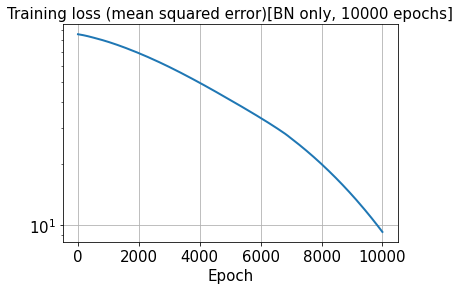

In [30]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.yscale("log")
plt.title('Training loss (mean squared error)[BN only, 10000 epochs]', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

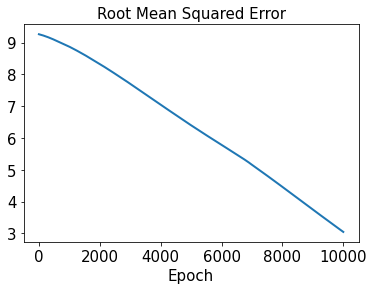

In [18]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [19]:
decoded_sensor_train = sensor_pred1.predict(t_train)

In [20]:
decoded_sensor_test = sensor_pred1.predict(t_test)

In [21]:
error_train_abs = np.abs(decoded_sensor_train - x_train)

In [22]:
error_test_abs = np.abs(decoded_sensor_test - x_test)

In [23]:
error_train_abs

array([[[3.65251422e-02],
        [1.00366020e-01],
        [1.80642986e-01],
        [6.32612228e-02],
        [3.65554333e-01],
        [5.95960426e-01],
        [9.87241840e-01],
        [1.15701475e+00],
        [1.43238277e+00],
        [2.02618504e+00],
        [2.28104000e+00],
        [3.34827194e+00],
        [5.00227108e+00],
        [5.07355137e+00],
        [5.80027151e+00],
        [4.97512703e+00]],

       [[1.00473595e-01],
        [1.49050617e-01],
        [3.05701995e-01],
        [1.25063848e-01],
        [6.67752385e-01],
        [1.05599718e+00],
        [1.43654988e+00],
        [2.11736163e+00],
        [2.24363981e+00],
        [1.76253295e+00],
        [3.15476637e+00],
        [3.98510072e+00],
        [3.50388106e+00],
        [3.85589064e+00],
        [4.49692065e+00],
        [4.76048832e+00]],

       [[4.39079285e-02],
        [1.22696257e-01],
        [2.19309664e-01],
        [8.48024368e-02],
        [4.35476303e-01],
        [7.09971619e-01],
        

In [24]:
l2_error_sensor_train = np.sqrt(np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2))
print(l2_error_sensor_train)

0.3248657276344405


In [25]:
l2_error_sensor_test = np.sqrt(np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2))
print(l2_error_sensor_test)

0.310500975544838
